<a href="https://colab.research.google.com/github/Gupta-Vaishali/Song-Genre-Classification/blob/main/RNN_4(2)(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1 Importing required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### ***Hip-Hop***

In [ ]:
# 2 Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in df['genre'].unique() :
  if i.lower() == 'hip-hop':
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:1600]
  else :
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:160]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))


# Changing problem to one-vs-all
for i in df_subset.index:
  if df_subset.loc[i,'genre'].lower() != 'hip-hop':
    df_subset.loc[i,'genre'] = 'NotHip-Hop'

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_subset['genre_code'] = lb_make.fit_transform(df_subset['genre'])
df_subset.head()

No. of records in smaller sample =  3200


,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics,genre_code
0,122139,fire,2001,etta-james,NotHip-Hop,fire fire fire im on fire fire fire fire lord ...,"['fire', 'fire', 'fire', 'im', 'fire', 'fire',...","['fire', 'fire', 'fire', 'im', 'fire', 'fire',...",['fire'],fire,fire fire fire im fire fire fire fire lord set...,"['fire', 'im', 'lord', 'set', 'touch', 'take',...",117,446,117,7,fire fire fire I am fire fire fire fire lord s...,1
1,188157,b-boy-bouillabaisse,2008,beastie-boys,Hip-Hop,there's a girl over there with long brown hair...,"[""'s"", 'girl', 'long', 'brown', 'hair', 'took'...","[""'s"", 'girl', 'long', 'brown', 'hair', 'took'...","['b', 'boy', 'bouillabaisse']",b boy bouillabaisse,be girl long brown hair take place throw mattr...,"['be', 'girl', 'long', 'brown', 'hair', 'take'...",992,4396,992,3,be girl long brown hair take place throw mattr...,0
2,65702,land-69,2006,69-boyz,Hip-Hop,69 first of all before we get this started let...,"['69', 'first', 'get', 'started', 'let', 'clea...","['69', 'first', 'get', 'start', 'let', 'clear'...","['land', '69']",land 69,69 first get start let clear throat 69 true ge...,"['69', 'first', 'get', 'start', 'let', 'clear'...",129,540,129,2,69 first get start let clear throat 69 true ge...,0
3,96591,i-send-pictures,2006,clutch,NotHip-Hop,i send pictures through the mail of buried tre...,"['send', 'pictures', 'mail', 'buried', 'treasu...","['send', 'pictur', 'mail', 'buri', 'treasur', ...","['i', 'send', 'pictures']",i send picture,send picture mail bury treasure humpback whale...,"['send', 'picture', 'mail', 'bury', 'treasure'...",88,406,88,1,send picture mail bury treasure humpback whale...,1
4,30054,fuck-da-world,2013,ace-hood,Hip-Hop,dear heavenly father i come to you today to re...,"['dear', 'heavenly', 'father', 'come', 'today'...","['dear', 'heavenli', 'father', 'come', 'today'...","['fuck', 'da', 'world']",fuck da world,dear heavenly father come today remove evil sp...,"['dear', 'heavenly', 'father', 'come', 'today'...",300,1434,300,0,dear heavenly father come today remove evil sp...,0


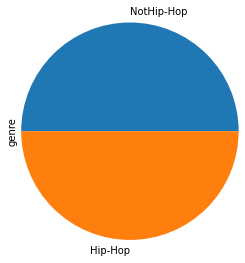

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df_subset['genre'].value_counts().plot.pie(radius=1.25)

In [ ]:
# 4 - extracting the required columns
df_subset['expanded_lyrics'].fillna(value=' ',inplace =True)
X = df_subset['expanded_lyrics']
Y = df_subset['genre_code']


# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

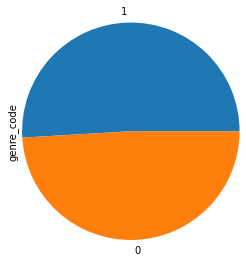

In [ ]:
# Showing a pie-chart of all the genres in the dataset
Y_test.value_counts().plot.pie(radius=1.25)

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train[1]

"be girl long brown hair take place throw mattres face take shirt take bra take pant know see right will like dedicate song main homie mike get mic g get mic get mic get mic mike let be real be cloud issue rhyme dope c must listen people say missin missin get mic let be show like used say fuck yo holme fuck be king ad whammy be dick butku one half science another half soul name be mike fat morton jelly roll get busy frisco fool around fresno get girlie because know never say j get mic get mic g get mic get mic mike well mike special individual pull knot pull residual go movy get rolo cholo ride slow low mike mic bust solo mike stromie be selfish get mic because know eat shellfish be 4 00 have get dr hfuhruhurr ale have get nothe lose be pissin third rail groggy eye fry be head station train ride coney island vacation dedicate boofer back 1 train will kick window high cocaine jump turnstile lose last token ride car piss smoke head last car fluorescent light blackout policeman tell homeb

In [ ]:
vocab_size = 30000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]


In [ ]:
print(X_train[1])

[28555, 6487, 14353, 1017, 27424, 12977, 6303, 14547, 14607, 18921, 11898, 25342, 5519, 11106, 7630, 15017, 17844, 28942, 10605, 5911, 28713, 6372, 14214, 3313, 20003, 3652, 29746, 4073, 28555, 2915, 23268, 2055, 26562, 9061, 10483, 10483, 10483, 10483, 28713, 3313, 24699, 5890, 515, 25078, 3313, 24699, 5890, 515, 25078, 28555, 27370, 12193, 20658, 22404, 24699, 25078, 3017, 1650, 19804, 7512, 3313, 18701, 3313, 17786, 25550, 15839, 28848, 16919, 15506, 27617, 1501, 26043, 20658, 2249, 13106, 11411, 14137, 12315, 10630, 15923, 28362, 19300, 11529, 11970, 3413, 6192, 1849, 8083, 3313, 10483, 10483, 10483, 10483, 28713, 3313, 24699, 5890, 515, 25078, 3313, 24699, 5890, 515, 25078, 28555, 27370, 12193, 20658, 22404, 24699, 25078, 5921, 8225, 26173, 3313, 13141, 8262, 9938, 26766, 8262, 12500]


In [ ]:
max_length = 250
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
X_train[1]

array([28555,  6487, 14353,  1017, 27424, 12977,  6303, 14547, 14607,
       18921, 11898, 25342,  5519, 11106,  7630, 15017, 17844, 28942,
       10605,  5911, 28713,  6372, 14214,  3313, 20003,  3652, 29746,
        4073, 28555,  2915, 23268,  2055, 26562,  9061, 10483, 10483,
       10483, 10483, 28713,  3313, 24699,  5890,   515, 25078,  3313,
       24699,  5890,   515, 25078, 28555, 27370, 12193, 20658, 22404,
       24699, 25078,  3017,  1650, 19804,  7512,  3313, 18701,  3313,
       17786, 25550, 15839, 28848, 16919, 15506, 27617,  1501, 26043,
       20658,  2249, 13106, 11411, 14137, 12315, 10630, 15923, 28362,
       19300, 11529, 11970,  3413,  6192,  1849,  8083,  3313, 10483,
       10483, 10483, 10483, 28713,  3313, 24699,  5890,   515, 25078,
        3313, 24699,  5890,   515, 25078, 28555, 27370, 12193, 20658,
       22404, 24699, 25078,  5921,  8225, 26173,  3313, 13141,  8262,
        9938, 26766,  8262, 12500,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
#for 
training_padded = np.array(X_train)
training_padded = np.array(training_padded)
training_labels = np.array(Y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(Y_test)
from keras.utils import np_utils

testing_labels_en = np_utils.to_categorical(testing_labels)
training_labels_en = np_utils.to_categorical(training_labels)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout,GRU, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
model0 = 0

In [ ]:
model0 = Sequential()
model0.add(Embedding(vocab_size,100,input_length = max_length))
#model0.add(SimpleRNN(16))
model0.add(LSTM(32, return_sequences=False,dropout=0.5))
#model0.add(GRU(8, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(32, activation='sigmoid')) 
model0.add(Dense(2, activation='softmax'))
#from keras.optimizers import Adagrad
#opt = Adagrad(learning_rate=1)

In [ ]:
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 3,018,146
Trainable params: 3,018,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.shape(training_padded)

(2560, 250)

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=10,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/10
112/112 [==============================] - 14s 106ms/step - loss: 0.5294 - categorical_accuracy: 0.7690 - val_loss: 0.4565 - val_categorical_accuracy: 0.8138
Epoch 2/10
112/112 [==============================] - 12s 103ms/step - loss: 0.4382 - categorical_accuracy: 0.8220 - val_loss: 0.4296 - val_categorical_accuracy: 0.8294
Epoch 3/10
112/112 [==============================] - 12s 104ms/step - loss: 0.4396 - categorical_accuracy: 0.8158 - val_loss: 0.4561 - val_categorical_accuracy: 0.8086
Epoch 4/10
112/112 [==============================] - 12s 104ms/step - loss: 0.4231 - categorical_accuracy: 0.8237 - val_loss: 0.4440 - val_categorical_accuracy: 0.8138
Epoch 5/10
112/112 [==============================] - 12s 104ms/step - loss: 0.3904 - categorical_accuracy: 0.8320 - val_loss: 0.4259 - val_categorical_accuracy: 0.8320
Epoch 6/10
112/112 [==============================] - 12s 106ms/step - loss: 0.3319 - categorical_accuracy: 0.8717 - val_loss: 0.4064 - val_categorical_acc

In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.8515625
Precision: 0.8552276034088546
Recall: 0.8506017740611934
F1-score: 0.850889390829207


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       314
           1       0.82      0.90      0.86       326

    accuracy                           0.85       640
   macro avg       0.86      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640



In [ ]:
_, accuracy = model0.evaluate(testing_padded, testing_labels_en, verbose=1)
print(accuracy)

20/20 [==============================] - 1s 21ms/step - loss: 0.4492 - categorical_accuracy: 0.8516
0.8515625


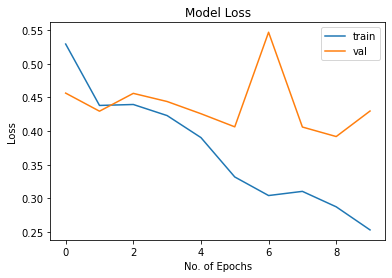

In [ ]:
# summarize history for loss
plt.plot(H0.history['loss'])
plt.plot(H0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='upper right')
#plt.savefig('graph3.pdf')
#from google.colab import files
#files.download('graph3.pdf')
plt.show()

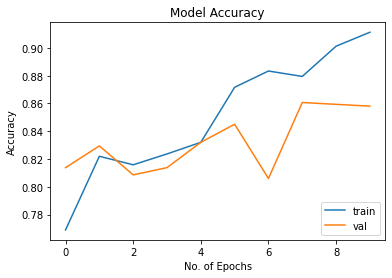

In [ ]:
# summarize history for accuracy
plt.plot(H0.history['categorical_accuracy'])
plt.plot(H0.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='lower right')
#plt.savefig('graph4.pdf')
#from google.colab import files
#files.download('graph4.pdf')
plt.show()

### ***Folk***

In [ ]:
# 2 Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in df['genre'].unique() :
  if i.lower() == 'folk':
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:1600]
  else :
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:160]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))


# Changing problem to one-vs-all
for i in df_subset.index:
  if df_subset.loc[i,'genre'].lower() != 'folk':
    df_subset.loc[i,'genre'] = 'NotFolk'

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_subset['genre_code'] = lb_make.fit_transform(df_subset['genre'])
df_subset.head()

No. of records in smaller sample =  3200


,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics,genre_code
0,104275,sexual-telepathy,2006,disappear-fear,Folk,3 07 all of the fire burning inside ya be tru...,"['3', '07', 'fire', 'burning', 'inside', 'ya',...","['3', '07', 'fire', 'burn', 'insid', 'ya', 'tr...","['sexual', 'telepathy']",sexual telepathy,3 07 fire burn inside ya true moment be true s...,"['3', '07', 'fire', 'burn', 'inside', 'ya', 't...",34,150,34,0,3 07 fire burn inside ya true moment be true s...,0
1,136502,the-skye-boat-song,2006,the-corries,Folk,speed bonnie boat like a bird on the wing onwa...,"['speed', 'bonnie', 'boat', 'like', 'bird', 'w...","['speed', 'bonni', 'boat', 'like', 'bird', 'wi...","['the', 'skye', 'boat', 'song']",the skye boat song,speed bonnie boat like bird wing onward sailor...,"['speed', 'bonnie', 'boat', 'like', 'bird', 'w...",111,483,111,0,speed bonnie boat like bird wing onward sailor...,0
2,76619,hen-irish-eyes-are-smiling,2007,bing-crosby,NotFolk,there's a tear in your eye and i'm wondering w...,"[""'s"", 'tear', 'eye', ""'m"", 'wondering', 'neve...","[""'s"", 'tear', 'eye', ""'m"", 'wonder', 'never',...","['hen', 'irish', 'eyes', 'are', 'smiling']",hen irish eye be smile,be tear eye be wonder never pow'r smile sure s...,"['be', 'tear', 'eye', 'wonder', 'never', ""pow'...",123,577,123,0,be tear eye be wonder never pow'r smile sure s...,1
3,10511,friends,2016,fetty-wap,NotFolk,i swear you're the type that i want what you l...,"['swear', ""'re"", 'type', 'want', 'liking', 'ba...","['swear', ""'re"", 'type', 'want', 'like', 'babi...",['friends'],friend,swear be type want like baby girl need want sh...,"['swear', 'be', 'type', 'want', 'like', 'baby'...",159,627,159,0,swear be type want like baby girl need want sh...,1
4,10775,may-it-be,2005,celtic-woman,Folk,may it be an evening star shines down upon you...,"['may', 'evening', 'star', 'shines', 'upon', '...","['may', 'even', 'star', 'shine', 'upon', 'may'...","['may', 'it', 'be']",may it be,may even star shine upon may darknes fall hear...,"['may', 'even', 'star', 'shine', 'upon', 'dark...",61,277,61,0,may even star shine upon may darknes fall hear...,0


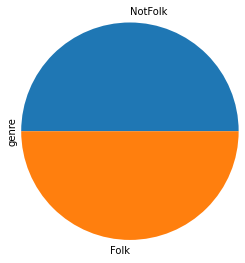

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df_subset['genre'].value_counts().plot.pie(radius=1.25)

In [ ]:
# 4 - extracting the required columns
df_subset['expanded_lyrics'].fillna(value=' ',inplace =True)
X = df_subset['expanded_lyrics']
Y = df_subset['genre_code']


# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

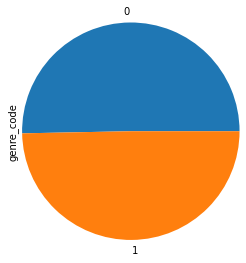

In [ ]:
# Showing a pie-chart of all the genres in the dataset
Y_test.value_counts().plot.pie(radius=1.25)

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train[1]

'speed bonnie boat like bird wing onward sailor cry carry lad be born king sea skye loud wind howl loud wave roar thunderclap rend air baffle foe stand shore follow dare speed bonnie boat like bird wing onward sailor cry carry lad be born king sea skye many be lad fight day well claymore wield night come silently lain dead culloden field speed bonnie boat like bird wing onward sailor cry carry lad be born king sea skye though wave heave soft ye sleep ocean be royal bed rock deep flora keep watch weary head speed bonnie boat like bird wing onward sailor cry carry lad be born king sea skye'

In [ ]:
vocab_size = 30000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]


In [ ]:
print(X_train[1])

[22086, 24125, 22846, 1379, 27165, 19141, 27165, 19141, 22086, 24125, 22846, 1379, 27165, 19141, 28797, 22086, 24125, 22846, 1379, 9138, 3218, 3015, 28797, 22492, 28797, 27165, 19141, 28797, 22086, 27271, 17734, 12036, 27165, 19141, 27165, 19141, 22086, 27271, 17734, 12036, 27165, 19141, 28797, 22086, 27271, 17734, 12036, 26191, 13068, 24616, 3015, 28797, 22492, 28797, 27165, 19141, 28797, 22086, 15794, 17734, 21307, 27165, 19141, 27165, 19141, 22086, 15794, 17734, 21307, 27165, 19141, 28797, 22086, 15794, 17734, 21307, 2899, 13992, 10178, 3015, 28797, 22492, 28797, 27165, 19141, 28797, 23643, 16087, 434, 1616, 27165, 19141, 27165, 19141, 23643, 16087, 434, 1616, 27165, 19141, 28797, 23643, 16087, 434, 1616, 27165, 19141, 28797, 23643, 16087, 434, 1616, 23643, 434, 26679, 4314]


In [ ]:
max_length = 250
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
X_train[1]

array([22086, 24125, 22846,  1379, 27165, 19141, 27165, 19141, 22086,
       24125, 22846,  1379, 27165, 19141, 28797, 22086, 24125, 22846,
        1379,  9138,  3218,  3015, 28797, 22492, 28797, 27165, 19141,
       28797, 22086, 27271, 17734, 12036, 27165, 19141, 27165, 19141,
       22086, 27271, 17734, 12036, 27165, 19141, 28797, 22086, 27271,
       17734, 12036, 26191, 13068, 24616,  3015, 28797, 22492, 28797,
       27165, 19141, 28797, 22086, 15794, 17734, 21307, 27165, 19141,
       27165, 19141, 22086, 15794, 17734, 21307, 27165, 19141, 28797,
       22086, 15794, 17734, 21307,  2899, 13992, 10178,  3015, 28797,
       22492, 28797, 27165, 19141, 28797, 23643, 16087,   434,  1616,
       27165, 19141, 27165, 19141, 23643, 16087,   434,  1616, 27165,
       19141, 28797, 23643, 16087,   434,  1616, 27165, 19141, 28797,
       23643, 16087,   434,  1616, 23643,   434, 26679,  4314,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
#for 
training_padded = np.array(X_train)
training_padded = np.array(training_padded)
training_labels = np.array(Y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(Y_test)
from keras.utils import np_utils

testing_labels_en = np_utils.to_categorical(testing_labels)
training_labels_en = np_utils.to_categorical(training_labels)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout,GRU, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
model0 = 0

In [ ]:
model0 = Sequential()
model0.add(Embedding(vocab_size,128,input_length = max_length))
#model0.add(SimpleRNN(16))
model0.add(LSTM(64, return_sequences=False,dropout=0.5))
#model0.add(GRU(8, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(32, activation='sigmoid')) 
model0.add(Dense(2, activation='softmax'))
#from keras.optimizers import Adagrad
#opt = Adagrad(learning_rate=1)

In [ ]:
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model0.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 250, 128)          3840000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 3,891,554
Trainable params: 3,891,554
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.shape(training_padded)

(2560, 250)

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=30,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/30
112/112 [==============================] - 21s 172ms/step - loss: 0.6963 - categorical_accuracy: 0.4883 - val_loss: 0.6945 - val_categorical_accuracy: 0.4779
Epoch 2/30
112/112 [==============================] - 19s 167ms/step - loss: 0.6946 - categorical_accuracy: 0.5067 - val_loss: 0.6804 - val_categorical_accuracy: 0.5664
Epoch 3/30
112/112 [==============================] - 18s 164ms/step - loss: 0.6796 - categorical_accuracy: 0.5028 - val_loss: 0.6750 - val_categorical_accuracy: 0.5638
Epoch 4/30
112/112 [==============================] - 18s 165ms/step - loss: 0.6688 - categorical_accuracy: 0.5246 - val_loss: 0.6742 - val_categorical_accuracy: 0.5638
Epoch 5/30
112/112 [==============================] - 18s 164ms/step - loss: 0.6613 - categorical_accuracy: 0.5285 - val_loss: 0.6735 - val_categorical_accuracy: 0.5638
Epoch 6/30
112/112 [==============================] - 18s 165ms/step - loss: 0.6610 - categorical_accuracy: 0.5151 - val_loss: 0.6676 - val_categorical_acc

In [ ]:
# start training
H1 = model0.fit(training_padded,training_labels_en, epochs=30,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/30
112/112 [==============================] - 19s 174ms/step - loss: 0.1219 - categorical_accuracy: 0.9688 - val_loss: 0.9755 - val_categorical_accuracy: 0.6536
Epoch 2/30
112/112 [==============================] - 20s 177ms/step - loss: 0.1106 - categorical_accuracy: 0.9732 - val_loss: 1.2271 - val_categorical_accuracy: 0.6276
Epoch 3/30
112/112 [==============================] - 19s 173ms/step - loss: 0.1183 - categorical_accuracy: 0.9704 - val_loss: 1.0808 - val_categorical_accuracy: 0.6589
Epoch 4/30
112/112 [==============================] - 19s 172ms/step - loss: 0.0969 - categorical_accuracy: 0.9777 - val_loss: 1.1681 - val_categorical_accuracy: 0.6536
Epoch 5/30
112/112 [==============================] - 19s 172ms/step - loss: 0.0808 - categorical_accuracy: 0.9816 - val_loss: 1.3743 - val_categorical_accuracy: 0.6380
Epoch 6/30
112/112 [==============================] - 19s 172ms/step - loss: 0.0827 - categorical_accuracy: 0.9805 - val_loss: 1.2299 - val_categorical_acc

In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.615625
Precision: 0.6163546798029557
Recall: 0.6153365365834602
F1-score: 0.6146616541353382


In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.6484375
Precision: 0.6486175678982138
Recall: 0.6482968084690808
F1-score: 0.6481892741704963


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.67      0.66       322
           1       0.65      0.63      0.64       318

    accuracy                           0.65       640
   macro avg       0.65      0.65      0.65       640
weighted avg       0.65      0.65      0.65       640



In [ ]:
_, accuracy = model0.evaluate(testing_padded, testing_labels_en, verbose=1)
print(accuracy)

20/20 [==============================] - 1s 34ms/step - loss: 2.1881 - categorical_accuracy: 0.6484
0.6484375


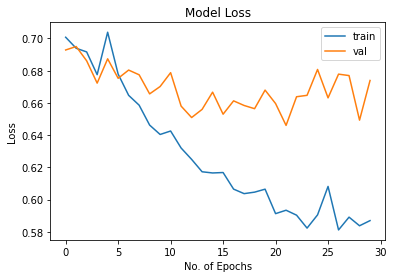

In [ ]:
# summarize history for loss
plt.plot(H0.history['loss'])
plt.plot(H0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='upper right')
#plt.savefig('graph3.pdf')
#from google.colab import files
#files.download('graph3.pdf')
plt.show()

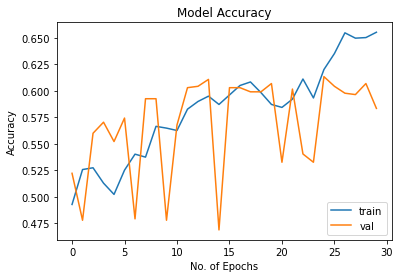

In [ ]:
# summarize history for accuracy
plt.plot(H0.history['categorical_accuracy'])
plt.plot(H0.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='lower right')
#plt.savefig('graph4.pdf')
#from google.colab import files
#files.download('graph4.pdf')
plt.show()

### ***Indie***

In [ ]:
# 2 Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in df['genre'].unique() :
  if i.lower() == 'indie':
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:1600]
  else :
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:160]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))


# Changing problem to one-vs-all
for i in df_subset.index:
  if df_subset.loc[i,'genre'].lower() != 'indie':
    df_subset.loc[i,'genre'] = 'NotIndie'

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_subset['genre_code'] = lb_make.fit_transform(df_subset['genre'])
df_subset.head()

No. of records in smaller sample =  3200


,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics,genre_code
0,150292,i-can-love-you-better,2010,dixie-chicks,NotIndie,she's got you wrapped up in her satin and lace...,"[""'s"", 'got', 'wrapped', 'satin', 'lace', 'tie...","[""'s"", 'got', 'wrap', 'satin', 'lace', 'tie', ...","['i', 'can', 'love', 'you', 'better']",i can love you better,be get wrapped satin lace tie around little fi...,"['be', 'get', 'wrapped', 'satin', 'lace', 'tie...",151,656,151,0,be get wrapped satin lace tie around little fi...,1
1,166539,you-gotta-go,2006,brian-mcknight,NotIndie,every time that i'm with you girl i can't beli...,"['every', 'time', ""'m"", 'girl', 'ca', ""n't"", '...","['everi', 'time', ""'m"", 'girl', 'ca', ""n't"", '...","['you', 'gotta', 'go']",you gotta go,every time be girl ca be believe share world b...,"['every', 'time', 'be', 'girl', 'ca', 'believe...",112,461,112,0,every time be girl ca be believe share world b...,1
2,135369,girl-laying-down,2007,anna-ternheim,Indie,i know a girl laying down she's sleeping weeks...,"['know', 'girl', 'laying', ""'s"", 'sleeping', '...","['know', 'girl', 'lay', ""'s"", 'sleep', 'week',...","['girl', 'laying', 'down']",girl layer down,know girl layer be sleep week time wake watch ...,"['know', 'girl', 'layer', 'be', 'sleep', 'week...",83,380,83,0,know girl layer be sleep week time wake watch ...,0
3,214349,learn-yourself,2007,the-beautiful-girls,Indie,everybody thinks we'll fall apart everybody's ...,"['everybody', 'thinks', ""'ll"", 'fall', 'apart'...","['everybodi', 'think', ""'ll"", 'fall', 'apart',...","['learn', 'yourself']",learn yourself,everybody think will fall apart everybody be q...,"['everybody', 'think', 'will', 'fall', 'apart'...",100,423,100,0,everybody think will fall apart everybody be q...,0
4,177213,i-really-don-t-care-what-you-did-on-your-gap-year,2007,frank-turner,Indie,we were only supposed to go out for the night ...,"['supposed', 'go', 'night', ""'s"", 'hours', 'si...","['suppos', 'go', 'night', ""'s"", 'hour', 'sinc'...","['i', 'really', 'don', 't', 'care', 'what', 'y...",i really don t care what you do on your gap year,suppose go night be hour since get light be me...,"['suppose', 'go', 'night', 'be', 'hour', 'sinc...",175,694,175,0,suppose go night be hour since get light be me...,0


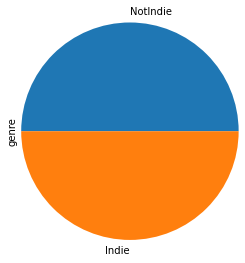

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df_subset['genre'].value_counts().plot.pie(radius=1.25)

In [ ]:
# 4 - extracting the required columns
df_subset['expanded_lyrics'].fillna(value=' ',inplace =True)
X = df_subset['expanded_lyrics']
Y = df_subset['genre_code']


# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

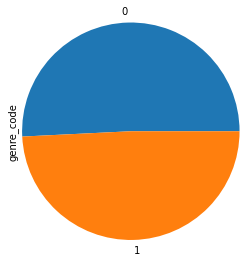

In [ ]:
# Showing a pie-chart of all the genres in the dataset
Y_test.value_counts().plot.pie(radius=1.25)

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train[1]

'every time be girl ca be believe share world be real every time hold close forever be see feel see be give damn homy say be matter anyway see never feel way leave brother want hate see go even though know be comin back be hard breathe without girl baby be fact know sometime leave wish can stay every time go away first time touch babe can be find word say set free every time kiss lip nothin ever taste quite like get deep see be give damn homy say be matter anyway see never ever feel way alway leave want be sunshine day brighten night take piece every time say goodbye'

In [ ]:
vocab_size = 30000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]


In [ ]:
print(X_train[1])

[25800, 12500, 21522, 16088, 3974, 12066, 10605, 29410, 15426, 12529, 12066, 15426, 28839, 29410, 10730, 12529, 12500, 29459, 515, 3313, 10730, 8459, 3313, 10730, 8459, 3313, 10730, 8459, 11408, 29746, 23361, 14836, 23475, 19134, 29658, 19282, 3313, 11288, 25800, 10605, 12066, 25174, 25218, 19313, 26172, 6564, 3313, 19773, 22308, 10730, 7292, 12066, 521, 15985, 521, 10730, 5921, 10605, 12066, 3313, 29459, 515, 28713, 3313, 10730, 8459, 3313, 10730, 8459, 3313, 10730, 8459, 11408, 29746, 23361, 14836, 23475, 19134, 29658, 19282, 3313, 11288, 515, 3313, 10730, 8459, 3313, 10730, 8459, 3313, 10730, 8459, 11408, 29746, 23361, 14836, 23475, 19134, 29658, 19282, 3313, 11288, 8262, 27370, 13549, 27747, 8262, 14083, 17706, 3313, 22689, 28713, 8493, 15018, 8493, 15018, 26028, 8493, 15018, 8493, 15018, 26028, 3313, 10730, 8459, 3313, 10730, 8459, 3313, 10730, 8459, 11408, 29746, 23361, 14836, 19134, 14083, 11288, 16877]


In [ ]:
max_length = 250
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
X_train[1]

array([25800, 12500, 21522, 16088,  3974, 12066, 10605, 29410, 15426,
       12529, 12066, 15426, 28839, 29410, 10730, 12529, 12500, 29459,
         515,  3313, 10730,  8459,  3313, 10730,  8459,  3313, 10730,
        8459, 11408, 29746, 23361, 14836, 23475, 19134, 29658, 19282,
        3313, 11288, 25800, 10605, 12066, 25174, 25218, 19313, 26172,
        6564,  3313, 19773, 22308, 10730,  7292, 12066,   521, 15985,
         521, 10730,  5921, 10605, 12066,  3313, 29459,   515, 28713,
        3313, 10730,  8459,  3313, 10730,  8459,  3313, 10730,  8459,
       11408, 29746, 23361, 14836, 23475, 19134, 29658, 19282,  3313,
       11288,   515,  3313, 10730,  8459,  3313, 10730,  8459,  3313,
       10730,  8459, 11408, 29746, 23361, 14836, 23475, 19134, 29658,
       19282,  3313, 11288,  8262, 27370, 13549, 27747,  8262, 14083,
       17706,  3313, 22689, 28713,  8493, 15018,  8493, 15018, 26028,
        8493, 15018,  8493, 15018, 26028,  3313, 10730,  8459,  3313,
       10730,  8459,

In [ ]:
#for 
training_padded = np.array(X_train)
training_padded = np.array(training_padded)
training_labels = np.array(Y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(Y_test)
from keras.utils import np_utils

testing_labels_en = np_utils.to_categorical(testing_labels)
training_labels_en = np_utils.to_categorical(training_labels)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout,GRU, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
model0 = 0

In [ ]:
#changed no. of nodes
model0 = Sequential()
model0.add(Embedding(vocab_size,200,input_length = max_length))
#model0.add(SimpleRNN(16))
model0.add(LSTM(64, return_sequences=False))
#model0.add(GRU(32, return_sequences=False))
#model0.add(GRU(8, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(64, activation='sigmoid')) 
model0.add(Dense(2, activation='softmax'))
#from keras.optimizers import Adagrad
#opt = Adagrad(learning_rate=1)

In [ ]:
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model0.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 250, 200)          6000000   
_________________________________________________________________
lstm_23 (LSTM)               (None, 64)                67840     
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 130       
Total params: 6,072,130
Trainable params: 6,072,130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.shape(training_padded)

(2560, 250)

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=30,batch_size=16,validation_batch_size=16,validation_split=0.3,verbose=1)#epochs=15,validation_batch_size=16,

Epoch 1/30
112/112 [==============================] - 21s 186ms/step - loss: 0.6501 - categorical_accuracy: 0.5625 - val_loss: 0.7035 - val_categorical_accuracy: 0.5091
Epoch 2/30
112/112 [==============================] - 21s 186ms/step - loss: 0.6531 - categorical_accuracy: 0.5614 - val_loss: 0.7065 - val_categorical_accuracy: 0.5078
Epoch 3/30
112/112 [==============================] - 21s 186ms/step - loss: 0.6494 - categorical_accuracy: 0.5608 - val_loss: 0.6999 - val_categorical_accuracy: 0.5117
Epoch 4/30
112/112 [==============================] - 21s 184ms/step - loss: 0.6453 - categorical_accuracy: 0.5765 - val_loss: 0.7198 - val_categorical_accuracy: 0.5117
Epoch 5/30
112/112 [==============================] - 21s 185ms/step - loss: 0.6638 - categorical_accuracy: 0.5508 - val_loss: 0.6871 - val_categorical_accuracy: 0.5117
Epoch 6/30
112/112 [==============================] - 21s 185ms/step - loss: 0.6464 - categorical_accuracy: 0.5653 - val_loss: 0.6903 - val_categorical_acc

In [ ]:
# start training
H1 = model0.fit(training_padded,training_labels_en, epochs=20,batch_size=16,validation_batch_size=16,validation_split=0.3,verbose=1)#epochs=15,validation_batch_size=16,

Epoch 1/20
112/112 [==============================] - 21s 186ms/step - loss: 0.0288 - categorical_accuracy: 0.9911 - val_loss: 2.1667 - val_categorical_accuracy: 0.5716
Epoch 2/20
112/112 [==============================] - 21s 185ms/step - loss: 0.0214 - categorical_accuracy: 0.9939 - val_loss: 2.2275 - val_categorical_accuracy: 0.5573
Epoch 3/20
112/112 [==============================] - 21s 185ms/step - loss: 0.0146 - categorical_accuracy: 0.9955 - val_loss: 2.2253 - val_categorical_accuracy: 0.5807
Epoch 4/20
112/112 [==============================] - 21s 186ms/step - loss: 0.0526 - categorical_accuracy: 0.9838 - val_loss: 2.1549 - val_categorical_accuracy: 0.5612
Epoch 5/20
112/112 [==============================] - 21s 185ms/step - loss: 0.0195 - categorical_accuracy: 0.9944 - val_loss: 2.2166 - val_categorical_accuracy: 0.5703
Epoch 6/20
112/112 [==============================] - 21s 186ms/step - loss: 0.0112 - categorical_accuracy: 0.9972 - val_loss: 2.2629 - val_categorical_acc

In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.6203125
Precision: 0.6224820071569297
Recall: 0.619023199023199
F1-score: 0.617058054412623


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65       325
           1       0.64      0.54      0.58       315

    accuracy                           0.62       640
   macro avg       0.62      0.62      0.62       640
weighted avg       0.62      0.62      0.62       640



In [ ]:
_, accuracy = model0.evaluate(testing_padded, testing_labels_en, verbose=1)
print(accuracy)

20/20 [==============================] - 1s 38ms/step - loss: 2.5336 - categorical_accuracy: 0.6203
0.620312511920929


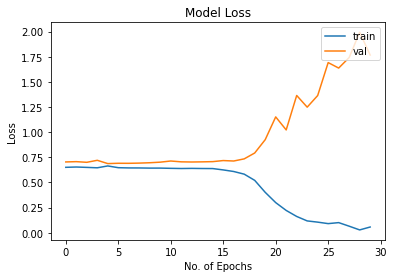

In [ ]:
# summarize history for loss
plt.plot(H0.history['loss'])
plt.plot(H0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='upper right')
#plt.savefig('graph3.pdf')
#from google.colab import files
#files.download('graph3.pdf')
plt.show()

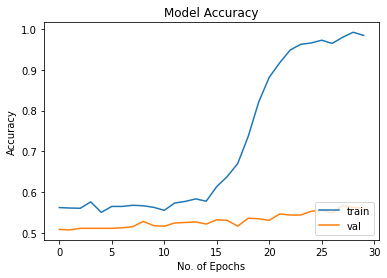

In [ ]:
# summarize history for accuracy
plt.plot(H0.history['categorical_accuracy'])
plt.plot(H0.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='lower right')
#plt.savefig('graph4.pdf')
#from google.colab import files
#files.download('graph4.pdf')
plt.show()

### ***Country***

In [ ]:
# 2 Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in df['genre'].unique() :
  if i.lower() == 'country':
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:1600]
  else :
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:160]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))


# Changing problem to one-vs-all
for i in df_subset.index:
  if df_subset.loc[i,'genre'].lower() != 'country':
    df_subset.loc[i,'genre'] = 'NotCountry'

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_subset['genre_code'] = lb_make.fit_transform(df_subset['genre'])
df_subset.head()

No. of records in smaller sample =  3200


,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics,genre_code
0,184569,gather-me-up,2008,carmen-rasmusen,NotCountry,gather me up like a handful of flowers wipe my...,"['gather', 'like', 'handful', 'flowers', 'wipe...","['gather', 'like', 'hand', 'flower', 'wipe', '...","['gather', 'me', 'up']",gather me up,gather like handful flower wipe tear like morn...,"['gather', 'like', 'handful', 'flower', 'wipe'...",131,587,131,0,gather like handful flower wipe tear like morn...,1
1,173725,little-wheel-spin-and-spin,2008,buffy-sainte-marie,NotCountry,little wheels spin and spin big wheels turn ar...,"['little', 'wheels', 'spin', 'spin', 'big', 'w...","['littl', 'wheel', 'spin', 'spin', 'big', 'whe...","['little', 'wheel', 'spin', 'and', 'spin']",little wheel spin and spin,little wheel spin spin big wheel turn around a...,"['little', 'wheel', 'spin', 'big', 'turn', 'ar...",144,654,144,0,little wheel spin spin big wheel turn around a...,1
2,17788,too-far-gone,1975,emmylou-harris,Country,i know that somewhere there's someone you love...,"['know', 'somewhere', ""'s"", 'someone', 'love',...","['know', 'somewher', ""'s"", 'someon', 'love', '...","['too', 'far', 'gone']",too far go,know somewhere be someone love someone love ha...,"['know', 'somewhere', 'be', 'someone', 'love',...",59,225,59,0,know somewhere be someone love someone love ha...,0
3,216580,baby-you-got-it,1992,brenton-wood,NotCountry,i run after you like a fool would do but mama ...,"['run', 'like', 'fool', 'would', 'mama', ""n't""...","['run', 'like', 'fool', 'would', 'mama', ""n't""...","['baby', 'you', 'got', 'it']",baby you get it,run like fool would mama be raise fool know ba...,"['run', 'like', 'fool', 'would', 'mama', 'be',...",115,464,115,0,run like fool would mama be raise fool know ba...,1
4,217723,i-can-give-you-what-you-want-now,2007,dean-martin,NotCountry,i can give you what you want now if you still ...,"['give', 'want', 'still', 'want', 'could', 'gi...","['give', 'want', 'still', 'want', 'could', 'gi...","['i', 'can', 'give', 'you', 'what', 'you', 'wa...",i can give you what you want now,give want still want can give give love want l...,"['give', 'want', 'still', 'can', 'love', 'need...",54,227,54,0,give want still want can give give love want l...,1


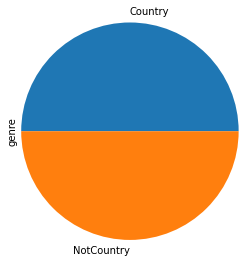

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df_subset['genre'].value_counts().plot.pie(radius=1.25)

In [ ]:
# 4 - extracting the required columns
df_subset['expanded_lyrics'].fillna(value=' ',inplace =True)
X = df_subset['expanded_lyrics']
Y = df_subset['genre_code']


# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

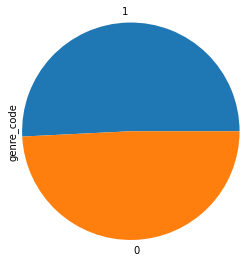

In [ ]:
# Showing a pie-chart of all the genres in the dataset
Y_test.value_counts().plot.pie(radius=1.25)

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train[1]

'little wheel spin spin big wheel turn around around 4x merry christma jingle bell christ born devil be hell heart shrink pocket swell everybody know nobody tell little wheel spin spin big wheel turn around around 4x oh sin caesar be men cry piou citizen petty thieve 5 10 big wheel turn around around little wheel spin spin big wheel turn around around 4x blame angel blame fate blame jew sister kate teach children hate big wheel turn around around little wheel spin spin big wheel turn around around 4x turn back weed have hoe silly sinful seed have sow add straw camel be load pray like hell world explode little wheel spin spin big wheel turn around around 4x swing girl fiddler say later piper pay see swing sway dead dance judgement day little wheel spin spin big wheel turn around around 4x'

In [ ]:
vocab_size = 30000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]


In [ ]:
print(X_train[2])

[20442, 273, 8609, 14101, 3313, 23445, 14101, 3313, 23445, 11106, 10784, 16426, 23654, 26096, 15263, 7026, 3313, 12500, 3974, 17844, 27747, 27424, 3313, 16940, 14598, 10730, 14598, 10730, 5890, 3313, 15013, 14598, 12423, 3313, 20077, 3313, 24064, 28093, 14598, 10730, 9938, 14797, 13353, 13353, 5265, 13463, 24064, 24465, 27370, 28800, 7253, 3313, 10605, 3368, 11944, 5921, 10605, 5921, 10605, 5921, 5921, 10605, 5921, 10605, 24709, 6746, 25165, 14797, 5921, 14797, 13353, 27437, 10784, 12977, 2473, 14101, 3313, 20434, 19282, 10784, 20442, 273, 8609, 14101, 3313, 23445, 14101, 3313, 23445, 11106, 3313, 12500, 3974, 3652, 29459, 9606, 26482, 6746, 14101, 14598, 10730, 9938, 14797, 13353, 13353, 5265, 13463, 24064, 24465, 27370, 28800, 7253, 3313, 10605, 3368, 11944, 5921, 10605, 5921, 10605, 5921, 5921, 10605, 5921, 10605, 24709, 6746, 25165, 14797, 5921, 14797, 13353, 7253, 3313, 10605, 3368, 11944, 5921, 10605, 5921, 10605, 5921, 7253, 3313, 10605, 3368, 11944, 5921, 10605, 5921, 10605, 59

In [ ]:
max_length = 250
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
X_train[1]

array([26215, 22663,  5014,  1017, 23818,  1056, 17887,  8609, 29239,
       12289,  3313,  4473, 27747, 26518,  5818, 14083, 22229, 26215,
       22663,  5014,  9381, 10605, 15134, 19645,  1634, 29642, 25439,
       29642, 12193, 10605,  3313,  2357, 26263, 13237,  4719,  2217,
       10007, 15872, 26893, 27265,  9865, 10605, 13415,  3313, 22370,
       12556, 28800, 21741, 17412,  6901, 17844, 21771, 11607, 16715,
        3313, 26482, 27337, 19124,  3974, 17786, 29459, 22761, 22663,
        5014,  3313, 27929, 28555, 25174,  3536, 29459, 22761,  7537,
       26518,  4494,  2513, 22550, 23684, 15337,  3313,  9938,  3313,
       15482, 26893, 28713,  3313, 21675, 29417, 13237, 16341,  7253,
        3313, 25330,  1634, 15111, 12193, 12977, 23684, 18499, 22343,
       29459,  6239, 27747, 26215, 22663,  5014, 29459,  6239, 27747,
       26215, 22663,  5014,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
#for 
training_padded = np.array(X_train)
training_padded = np.array(training_padded)
training_labels = np.array(Y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(Y_test)
from keras.utils import np_utils

testing_labels_en = np_utils.to_categorical(testing_labels)
training_labels_en = np_utils.to_categorical(training_labels)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout,GRU, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
model0 = 0

In [ ]:
model0 = Sequential()
model0.add(Embedding(vocab_size,100,input_length = max_length))
#model0.add(SimpleRNN(16))
model0.add(LSTM(64, return_sequences=False,dropout=0.5))
#model0.add(GRU(8, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(32, activation='sigmoid')) 
model0.add(Dense(2, activation='softmax'))
#from keras.optimizers import Adagrad
#opt = Adagrad(learning_rate=1)

In [ ]:
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model0.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 250, 100)          3000000   
_________________________________________________________________
lstm_25 (LSTM)               (None, 64)                42240     
_________________________________________________________________
dense_50 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 66        
Total params: 3,044,386
Trainable params: 3,044,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.shape(training_padded)

(2560, 250)

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=30,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/30
112/112 [==============================] - 17s 141ms/step - loss: 0.6888 - categorical_accuracy: 0.5396 - val_loss: 0.6782 - val_categorical_accuracy: 0.4727
Epoch 2/30
112/112 [==============================] - 15s 136ms/step - loss: 0.6974 - categorical_accuracy: 0.5312 - val_loss: 0.6743 - val_categorical_accuracy: 0.4727
Epoch 3/30
112/112 [==============================] - 15s 136ms/step - loss: 0.6735 - categorical_accuracy: 0.5273 - val_loss: 0.6594 - val_categorical_accuracy: 0.5885
Epoch 4/30
112/112 [==============================] - 15s 135ms/step - loss: 0.6653 - categorical_accuracy: 0.5352 - val_loss: 0.6720 - val_categorical_accuracy: 0.4727
Epoch 5/30
112/112 [==============================] - 15s 136ms/step - loss: 0.6738 - categorical_accuracy: 0.5229 - val_loss: 0.6714 - val_categorical_accuracy: 0.4727
Epoch 6/30
112/112 [==============================] - 15s 136ms/step - loss: 0.6654 - categorical_accuracy: 0.5251 - val_loss: 0.6717 - val_categorical_acc

In [ ]:
# start training
H1 = model0.fit(training_padded,training_labels_en, epochs=20,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/20
112/112 [==============================] - 15s 136ms/step - loss: 0.3613 - categorical_accuracy: 0.8705 - val_loss: 0.8082 - val_categorical_accuracy: 0.6276
Epoch 2/20
112/112 [==============================] - 15s 137ms/step - loss: 0.3388 - categorical_accuracy: 0.8850 - val_loss: 0.7923 - val_categorical_accuracy: 0.6484
Epoch 3/20
112/112 [==============================] - 15s 136ms/step - loss: 0.3186 - categorical_accuracy: 0.8917 - val_loss: 0.7839 - val_categorical_accuracy: 0.6536
Epoch 4/20
112/112 [==============================] - 15s 136ms/step - loss: 0.3000 - categorical_accuracy: 0.8996 - val_loss: 0.8874 - val_categorical_accuracy: 0.6445
Epoch 5/20
112/112 [==============================] - 15s 136ms/step - loss: 0.2769 - categorical_accuracy: 0.9074 - val_loss: 0.8256 - val_categorical_accuracy: 0.6680
Epoch 6/20
112/112 [==============================] - 15s 136ms/step - loss: 0.2954 - categorical_accuracy: 0.8990 - val_loss: 0.9568 - val_categorical_acc

In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.671875
Precision: 0.6721282645015682
Recall: 0.6720879120879121
F1-score: 0.6718717956230041


In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.6390625
Precision: 0.6389540566959921
Recall: 0.6388522588522588
F1-score: 0.6388641221374045


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63       315
           1       0.64      0.65      0.65       325

    accuracy                           0.64       640
   macro avg       0.64      0.64      0.64       640
weighted avg       0.64      0.64      0.64       640



In [ ]:
_, accuracy = model0.evaluate(testing_padded, testing_labels_en, verbose=1)
print(accuracy)

20/20 [==============================] - 1s 31ms/step - loss: 1.2191 - categorical_accuracy: 0.6391
0.6390625238418579


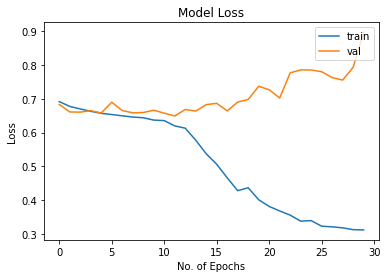

In [ ]:
# summarize history for loss
plt.plot(H0.history['loss'])
plt.plot(H0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='upper right')
#plt.savefig('graph3.pdf')
#from google.colab import files
#files.download('graph3.pdf')
plt.show()

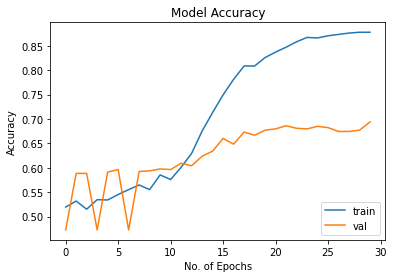

In [ ]:
# summarize history for accuracy
plt.plot(H0.history['categorical_accuracy'])
plt.plot(H0.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='lower right')
#plt.savefig('graph4.pdf')
#from google.colab import files
#files.download('graph4.pdf')
plt.show()

### ***Electronic***

In [ ]:
# 2 Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in df['genre'].unique() :
  if i.lower() == 'electronic':
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:1600]
  else :
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:160]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))


# Changing problem to one-vs-all
for i in df_subset.index:
  if df_subset.loc[i,'genre'].lower() != 'electronic':
    df_subset.loc[i,'genre'] = 'NotElectronic'

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_subset['genre_code'] = lb_make.fit_transform(df_subset['genre'])
df_subset.head()

No. of records in smaller sample =  3200


,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics,genre_code
0,170627,take-ya-clothes-off,2006,bone-crusher,NotElectronic,en e men e miny mo just a bunch of many naked...,"['en', 'e', 'men', 'e', 'miny', 'mo', 'bunch',...","['en', 'e', 'men', 'e', 'mini', 'mo', 'bunch',...","['take', 'ya', 'clothes', 'off']",take ya clothe off,en have men have miny mo bunch many nake hoe s...,"['en', 'have', 'men', 'miny', 'mo', 'bunch', '...",432,1733,432,1,en have men have miny mo bunch many nake hoe s...,1
1,17587,dreamer,2016,dave-love,Electronic,it's such a lonely world to never hear from yo...,"[""'s"", 'lonely', 'world', 'never', 'hear', 'wo...","[""'s"", 'lone', 'world', 'never', 'hear', 'word...",['dreamer'],dreamer,be lonely world never hear word text invite co...,"['be', 'lonely', 'world', 'never', 'hear', 'wo...",110,481,110,0,be lonely world never hear word text invite co...,0
2,141729,all-right,2012,double-vision,Electronic,you feel the things are going wrong and all th...,"['feel', 'things', 'going', 'wrong', 'things',...","['feel', 'thing', 'go', 'wrong', 'thing', 'kne...","['all', 'right']",all right,feel thing go wrong thing know fall fall sky e...,"['feel', 'thing', 'go', 'wrong', 'know', 'fall...",47,199,47,0,feel thing go wrong thing know fall fall sky e...,0
3,128244,electric-pulse-white-noise,2005,dj-tiesto,Electronic,its a little late love the night is caving in ...,"['little', 'late', 'love', 'night', 'caving', ...","['littl', 'late', 'love', 'night', 'cave', 'li...","['electric', 'pulse', 'white', 'noise']",electric pulse white noise,little late love night cave light hang overhea...,"['little', 'late', 'love', 'night', 'cave', 'l...",89,395,89,7,little late love night cave light hang overhea...,0
4,102347,lost-in-the-discotheque,2015,empyre-one,Electronic,no worry tonight it makes me feel alright it's...,"['worry', 'tonight', 'makes', 'feel', 'alright...","['worri', 'tonight', 'make', 'feel', 'alright'...","['lost', 'in', 'the', 'discotheque']",lose in the discotheque,worry tonight make feel alright be like im spa...,"['worry', 'tonight', 'make', 'feel', 'alright'...",195,866,195,1,worry tonight make feel alright be like I am s...,0


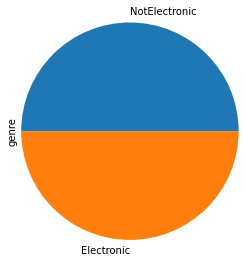

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df_subset['genre'].value_counts().plot.pie(radius=1.25)

In [ ]:
# 4 - extracting the required columns
df_subset['expanded_lyrics'].fillna(value=' ',inplace =True)
X = df_subset['expanded_lyrics']
Y = df_subset['genre_code']


# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

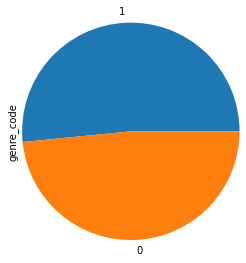

In [ ]:
# Showing a pie-chart of all the genres in the dataset
Y_test.value_counts().plot.pie(radius=1.25)

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train[1]

'be lonely world never hear word text invite come think sound like thing will be be because be think idea vision change be live alone would give world can find would dream night can talk because be seem right know would climb sky can meet since be around night nightmare because be dreamer without anyone love inside head be perfect girl be get ta hard give sign might seem far because be think idea vision change be live alone would give world can find would dream night can talk because be seem right know would climb sky can meet since be around night nightmare because be dreamer without anyone love'

In [ ]:
vocab_size = 30000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]


In [ ]:
print(X_train[1])

[7548, 7548, 7548, 7548, 7548, 7548, 7548, 7548, 7548, 7548, 7548, 7548, 7548, 7548, 27076, 18848, 18095, 26764, 18848, 27076, 18848, 18095, 26764, 18848, 3612, 17210, 5159, 28466, 27076, 10225, 20150, 4096, 3612, 16643, 21520, 27983, 10241, 6543, 3746, 28955, 3811, 10166, 24111, 24111, 24598, 18848, 7002, 26764, 2975, 18406, 11850, 16713, 27076, 7014, 6621, 17185, 17210, 29075, 27076, 13160, 27076, 18848, 18095, 26764, 18848, 27076, 18848, 18095, 26764, 18848, 5394, 22882, 26668, 29749, 21329, 29360, 24148, 3612, 27076, 11446, 20160, 27076, 11576, 27076, 2777, 22597, 3612, 8462, 20860, 24111, 24111, 24598, 18848, 7002, 26764, 2975, 18406, 11850, 16713, 27076, 7014, 6621, 17185, 17210, 29075, 27076, 13160, 27076, 18848, 18095, 26764, 18848, 27076, 18848, 18095, 26764, 18848, 2032, 11304, 19667, 3612, 6418, 18086, 15809, 3167, 8623, 22307, 22307, 29360, 29448, 3345, 3612, 2032, 27076, 9291, 15490, 24111, 24111, 24598, 18848, 7002, 26764, 2975, 18406, 11850, 16713, 27076, 7014, 6621, 171

In [ ]:
max_length = 250
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
X_train[1]

array([ 7548,  7548,  7548,  7548,  7548,  7548,  7548,  7548,  7548,
        7548,  7548,  7548,  7548,  7548, 27076, 18848, 18095, 26764,
       18848, 27076, 18848, 18095, 26764, 18848,  3612, 17210,  5159,
       28466, 27076, 10225, 20150,  4096,  3612, 16643, 21520, 27983,
       10241,  6543,  3746, 28955,  3811, 10166, 24111, 24111, 24598,
       18848,  7002, 26764,  2975, 18406, 11850, 16713, 27076,  7014,
        6621, 17185, 17210, 29075, 27076, 13160, 27076, 18848, 18095,
       26764, 18848, 27076, 18848, 18095, 26764, 18848,  5394, 22882,
       26668, 29749, 21329, 29360, 24148,  3612, 27076, 11446, 20160,
       27076, 11576, 27076,  2777, 22597,  3612,  8462, 20860, 24111,
       24111, 24598, 18848,  7002, 26764,  2975, 18406, 11850, 16713,
       27076,  7014,  6621, 17185, 17210, 29075, 27076, 13160, 27076,
       18848, 18095, 26764, 18848, 27076, 18848, 18095, 26764, 18848,
        2032, 11304, 19667,  3612,  6418, 18086, 15809,  3167,  8623,
       22307, 22307,

In [ ]:
#for 
training_padded = np.array(X_train)
training_padded = np.array(training_padded)
training_labels = np.array(Y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(Y_test)
from keras.utils import np_utils

testing_labels_en = np_utils.to_categorical(testing_labels)
training_labels_en = np_utils.to_categorical(training_labels)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout,GRU, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
model0 = 0

In [ ]:
model0 = Sequential()
model0.add(Embedding(vocab_size,128,input_length = max_length))
#model0.add(SimpleRNN(16))
model0.add(LSTM(32, return_sequences=False,dropout=0.5))
#model0.add(GRU(8, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(32, activation='sigmoid')) 
model0.add(Dense(2, activation='softmax'))
#from keras.optimizers import Adagrad
#opt = Adagrad(learning_rate=1)

In [ ]:
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model0.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 128)          3840000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 3,861,730
Trainable params: 3,861,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.shape(training_padded)

(2560, 250)

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=30,batch_size=16,validation_batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/30
112/112 [==============================] - 15s 135ms/step - loss: 0.6141 - categorical_accuracy: 0.5703 - val_loss: 0.7558 - val_categorical_accuracy: 0.5365
Epoch 2/30
112/112 [==============================] - 15s 135ms/step - loss: 0.5979 - categorical_accuracy: 0.5865 - val_loss: 0.7638 - val_categorical_accuracy: 0.5326
Epoch 3/30
112/112 [==============================] - 15s 135ms/step - loss: 0.5780 - categorical_accuracy: 0.5921 - val_loss: 0.7630 - val_categorical_accuracy: 0.5352
Epoch 4/30
112/112 [==============================] - 15s 134ms/step - loss: 0.5656 - categorical_accuracy: 0.6256 - val_loss: 0.8076 - val_categorical_accuracy: 0.5378
Epoch 5/30
112/112 [==============================] - 15s 134ms/step - loss: 0.5562 - categorical_accuracy: 0.6362 - val_loss: 0.8361 - val_categorical_accuracy: 0.5000
Epoch 6/30
112/112 [==============================] - 15s 133ms/step - loss: 0.5502 - categorical_accuracy: 0.6652 - val_loss: 0.8500 - val_categorical_acc

In [ ]:
# start training
H1 = model0.fit(training_padded,training_labels_en, epochs=20,batch_size=16,validation_batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/20
112/112 [==============================] - 15s 134ms/step - loss: 0.1900 - categorical_accuracy: 0.9330 - val_loss: 1.4541 - val_categorical_accuracy: 0.5456
Epoch 2/20
112/112 [==============================] - 15s 132ms/step - loss: 0.1625 - categorical_accuracy: 0.9369 - val_loss: 1.5350 - val_categorical_accuracy: 0.5391
Epoch 3/20
112/112 [==============================] - 15s 133ms/step - loss: 0.1507 - categorical_accuracy: 0.9487 - val_loss: 1.5053 - val_categorical_accuracy: 0.5339
Epoch 4/20
112/112 [==============================] - 15s 133ms/step - loss: 0.1834 - categorical_accuracy: 0.9330 - val_loss: 1.3758 - val_categorical_accuracy: 0.5391
Epoch 5/20
112/112 [==============================] - 15s 133ms/step - loss: 0.1638 - categorical_accuracy: 0.9353 - val_loss: 1.3949 - val_categorical_accuracy: 0.5443
Epoch 6/20
112/112 [==============================] - 15s 134ms/step - loss: 0.1711 - categorical_accuracy: 0.9509 - val_loss: 1.4040 - val_categorical_acc

In [ ]:
# start training
H2 = model0.fit(training_padded,training_labels_en, epochs=20,batch_size=16,validation_batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/20
112/112 [==============================] - 14s 128ms/step - loss: 0.1184 - categorical_accuracy: 0.9593 - val_loss: 1.5711 - val_categorical_accuracy: 0.5534
Epoch 2/20
112/112 [==============================] - 14s 125ms/step - loss: 0.0985 - categorical_accuracy: 0.9598 - val_loss: 1.9029 - val_categorical_accuracy: 0.5586
Epoch 3/20
112/112 [==============================] - 14s 124ms/step - loss: 0.1104 - categorical_accuracy: 0.9609 - val_loss: 1.6893 - val_categorical_accuracy: 0.5638
Epoch 4/20
112/112 [==============================] - 14s 124ms/step - loss: 0.0926 - categorical_accuracy: 0.9682 - val_loss: 1.7246 - val_categorical_accuracy: 0.5547
Epoch 5/20
112/112 [==============================] - 14s 123ms/step - loss: 0.0759 - categorical_accuracy: 0.9704 - val_loss: 1.8780 - val_categorical_accuracy: 0.5508
Epoch 6/20
112/112 [==============================] - 14s 125ms/step - loss: 0.0898 - categorical_accuracy: 0.9637 - val_loss: 1.7766 - val_categorical_acc

In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.621875
Precision: 0.6216569077385662
Recall: 0.6202346041055719
F1-score: 0.6199114566461505


In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.65625
Precision: 0.6586291853467425
Recall: 0.6535679374389052
F1-score: 0.6523250760538897


In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.6
Precision: 0.6009114583333333
Recall: 0.5969696969696969
F1-score: 0.5945798814225337


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62       310
           1       0.65      0.74      0.69       330

    accuracy                           0.66       640
   macro avg       0.66      0.65      0.65       640
weighted avg       0.66      0.66      0.65       640



In [ ]:
_, accuracy = model0.evaluate(testing_padded, testing_labels_en, verbose=1)
print(accuracy)

20/20 [==============================] - 1s 27ms/step - loss: 1.1856 - categorical_accuracy: 0.6219
0.621874988079071


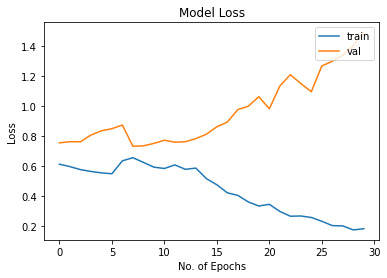

In [ ]:
# summarize history for loss
plt.plot(H0.history['loss'])
plt.plot(H0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='upper right')
#plt.savefig('graph3.pdf')
#from google.colab import files
#files.download('graph3.pdf')
plt.show()

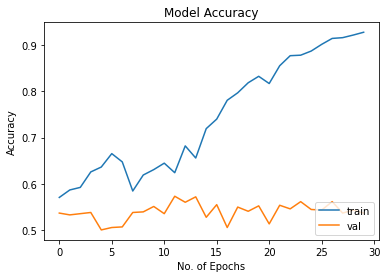

In [ ]:
# summarize history for accuracy
plt.plot(H0.history['categorical_accuracy'])
plt.plot(H0.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='lower right')
#plt.savefig('graph4.pdf')
#from google.colab import files
#files.download('graph4.pdf')
plt.show()

### ***Jazz***

In [ ]:
# 2 Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in df['genre'].unique() :
  if i.lower() == 'jazz':
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:1600]
  else :
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:160]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))


# Changing problem to one-vs-all
for i in df_subset.index:
  if df_subset.loc[i,'genre'].lower() != 'jazz':
    df_subset.loc[i,'genre'] = 'NotJazz'

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_subset['genre_code'] = lb_make.fit_transform(df_subset['genre'])
df_subset.head()

No. of records in smaller sample =  3200


,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics,genre_code
0,206630,know-that-i,2007,alice-smith,Jazz,you know that i feel love you know that i'd gi...,"['know', 'feel', 'love', 'know', ""'d"", 'give',...","['know', 'feel', 'love', 'know', ""'d"", 'give',...","['know', 'that', 'i']",know that i,know feel love know will give love every singl...,"['know', 'feel', 'love', 'will', 'give', 'ever...",66,280,66,0,know feel love know will give love every singl...,0
1,65349,love-somebody,2016,doris-day,Jazz,love somebody yes i do love somebody yes i do ...,"['love', 'somebody', 'yes', 'love', 'somebody'...","['love', 'somebodi', 'ye', 'love', 'somebodi',...","['love', 'somebody']",love somebody,love somebody ye love somebody ye love somebod...,"['love', 'somebody', 'ye', 'wo', 'be', 'say', ...",170,759,170,0,love somebody ye love somebody ye love somebod...,0
2,104514,home,2011,gil-scott-heron,Jazz,there's been a whole lot said about your city ...,"[""'s"", 'whole', 'lot', 'said', 'city', 'living...","[""'s"", 'whole', 'lot', 'said', 'citi', 'live',...",['home'],home,be whole lot say city live tell u street pave ...,"['be', 'whole', 'lot', 'say', 'city', 'live', ...",116,541,116,0,be whole lot say city live tell you street pav...,0
3,117559,black-tears,2007,aurora,NotJazz,look at the colours in the dreaming water the ...,"['look', 'colours', 'dreaming', 'water', 'moon...","['look', 'colour', 'dream', 'water', 'moon', '...","['black', 'tears']",black tear,look colour dream water moon set sea love far ...,"['look', 'colour', 'dream', 'water', 'moon', '...",62,282,62,0,look colour dream water moon set sea love far ...,1
4,3499,for-you-my-love,2013,delfonics,Jazz,for you my love and only you oh baby lonelines...,"['love', 'oh', 'baby', 'loneliness', 'hurts', ...","['love', 'oh', 'babi', 'loneli', 'hurt', ""'s"",...","['for', 'you', 'my', 'love']",for you my love,love oh baby lonelines hurt be drive crazy,"['love', 'oh', 'baby', 'lonelines', 'hurt', 'b...",8,35,8,0,love oh baby lonelines hurt be drive crazy,0


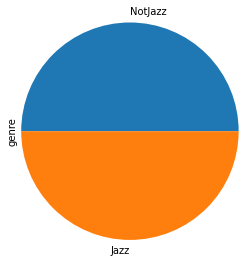

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df_subset['genre'].value_counts().plot.pie(radius=1.25)

In [ ]:
# 4 - extracting the required columns
df_subset['expanded_lyrics'].fillna(value=' ',inplace =True)
X = df_subset['expanded_lyrics']
Y = df_subset['genre_code']


# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

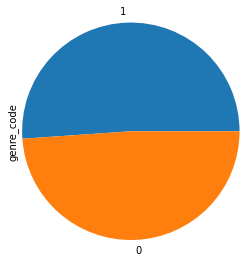

In [ ]:
# Showing a pie-chart of all the genres in the dataset
Y_test.value_counts().plot.pie(radius=1.25)

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train[1]

"love somebody ye love somebody ye love somebody ye love somebody wo be say handsome say be six feet tall picture be wall love baby doll kiss would be mind love somebody ye love somebody ye love somebody ye love somebody wo be say be know act shy oughta know would be dream even hurtin fly hope be pass because will die know will die love somebody ye love somebody ye love somebody ye love somebody wo be say be big strong wouldja like feel muscle bold gay never lose tussle moment be far away don'tcha say say already will want marry today be say happen possibility won'tcha tell ya love love somebody tell true ye ye love somebody maybe love somebody hope be ye love somebody wo be say c'mon confess don'tcha try guess tell let be tell promise breathe word dori be absurd strictly entre nou oui oui two well confidentially confidentially love somebody have get new love somebody feel way love somebody glad be true somebody love"

In [ ]:
vocab_size = 30000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]


In [ ]:
print(X_train[1])

[3612, 26908, 13204, 434, 11461, 22460, 3172, 28955, 27027, 19810, 5099, 28955, 6806, 19231, 29394, 17679, 29982, 16762, 6446, 22513, 3172, 28196, 28196, 8597, 22086, 15252, 15956, 13695, 2731, 23420, 11706, 3612, 6806, 24027, 15971, 18406, 23134, 1354, 25466, 17683, 8597, 24035, 6956, 27899, 29982, 22920, 28196, 28196, 8597, 22086, 15252, 15956, 13695, 18095, 11887, 8858, 27877, 16814, 21520, 9211, 7772, 18095, 11887, 8858, 11850, 11461, 27027, 3811, 18841, 27585, 18095, 11887, 8858, 27877, 16814, 21520, 9211, 7772, 18095, 11887, 8858, 11850, 11461, 27027, 3811, 18841, 27585, 28196, 15252, 18406, 29360, 18406, 16762, 27076, 12198, 19703, 14056, 1663, 12347, 3612, 18406, 21904, 11887, 3612, 11219, 137, 28196, 8597, 22086, 15252, 15956, 13695, 15956, 13695, 15956, 13695]


In [ ]:
max_length = 250
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
X_train[1]

array([ 3612, 26908, 13204,   434, 11461, 22460,  3172, 28955, 27027,
       19810,  5099, 28955,  6806, 19231, 29394, 17679, 29982, 16762,
        6446, 22513,  3172, 28196, 28196,  8597, 22086, 15252, 15956,
       13695,  2731, 23420, 11706,  3612,  6806, 24027, 15971, 18406,
       23134,  1354, 25466, 17683,  8597, 24035,  6956, 27899, 29982,
       22920, 28196, 28196,  8597, 22086, 15252, 15956, 13695, 18095,
       11887,  8858, 27877, 16814, 21520,  9211,  7772, 18095, 11887,
        8858, 11850, 11461, 27027,  3811, 18841, 27585, 18095, 11887,
        8858, 27877, 16814, 21520,  9211,  7772, 18095, 11887,  8858,
       11850, 11461, 27027,  3811, 18841, 27585, 28196, 15252, 18406,
       29360, 18406, 16762, 27076, 12198, 19703, 14056,  1663, 12347,
        3612, 18406, 21904, 11887,  3612, 11219,   137, 28196,  8597,
       22086, 15252, 15956, 13695, 15956, 13695, 15956, 13695,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
#for 
training_padded = np.array(X_train)
training_padded = np.array(training_padded)
training_labels = np.array(Y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(Y_test)
from keras.utils import np_utils

testing_labels_en = np_utils.to_categorical(testing_labels)
training_labels_en = np_utils.to_categorical(training_labels)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout,GRU, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
model0 = 0

In [ ]:
model0 = Sequential()
model0.add(Embedding(vocab_size,100,input_length = max_length))
#model0.add(SimpleRNN(16))
model0.add(LSTM(32, return_sequences=False,dropout=0.5))
#model0.add(GRU(8, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(32, activation='sigmoid')) 
model0.add(Dense(2, activation='softmax'))
#from keras.optimizers import Adagrad
#opt = Adagrad(learning_rate=1)

In [ ]:
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model0.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 250, 100)          3000000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 3,018,146
Trainable params: 3,018,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.shape(training_padded)

(2560, 250)

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=40,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/40
112/112 [==============================] - 15s 124ms/step - loss: 0.7034 - categorical_accuracy: 0.4916 - val_loss: 0.6928 - val_categorical_accuracy: 0.5104
Epoch 2/40
112/112 [==============================] - 13s 120ms/step - loss: 0.6965 - categorical_accuracy: 0.5117 - val_loss: 0.6914 - val_categorical_accuracy: 0.5326
Epoch 3/40
112/112 [==============================] - 13s 118ms/step - loss: 0.6829 - categorical_accuracy: 0.5312 - val_loss: 0.6812 - val_categorical_accuracy: 0.5391
Epoch 4/40
112/112 [==============================] - 14s 121ms/step - loss: 0.6662 - categorical_accuracy: 0.5597 - val_loss: 0.6802 - val_categorical_accuracy: 0.5391
Epoch 5/40
112/112 [==============================] - 13s 120ms/step - loss: 0.6649 - categorical_accuracy: 0.5586 - val_loss: 0.6808 - val_categorical_accuracy: 0.5352
Epoch 6/40
112/112 [==============================] - 13s 119ms/step - loss: 0.6601 - categorical_accuracy: 0.5290 - val_loss: 0.6840 - val_categorical_acc

In [ ]:
# start training
H1 = model0.fit(training_padded,training_labels_en, epochs=15,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/15
112/112 [==============================] - 14s 121ms/step - loss: 0.1925 - categorical_accuracy: 0.9464 - val_loss: 0.9870 - val_categorical_accuracy: 0.6940
Epoch 2/15
112/112 [==============================] - 13s 120ms/step - loss: 0.1906 - categorical_accuracy: 0.9481 - val_loss: 0.9524 - val_categorical_accuracy: 0.6536
Epoch 3/15
112/112 [==============================] - 13s 120ms/step - loss: 0.1924 - categorical_accuracy: 0.9453 - val_loss: 0.9825 - val_categorical_accuracy: 0.6875
Epoch 4/15
112/112 [==============================] - 13s 119ms/step - loss: 0.1776 - categorical_accuracy: 0.9515 - val_loss: 0.9319 - val_categorical_accuracy: 0.6888
Epoch 5/15
112/112 [==============================] - 13s 120ms/step - loss: 0.1820 - categorical_accuracy: 0.9487 - val_loss: 0.9857 - val_categorical_accuracy: 0.6576
Epoch 6/15
112/112 [==============================] - 13s 120ms/step - loss: 0.1678 - categorical_accuracy: 0.9565 - val_loss: 0.9887 - val_categorical_acc

In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.6703125
Precision: 0.6767573423206548
Recall: 0.6721722308526541
F1-score: 0.6686744770901061


In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.6546875
Precision: 0.664974358974359
Recall: 0.6571552793817355
F1-score: 0.6513087017510988


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69       313
           1       0.72      0.59      0.65       327

    accuracy                           0.67       640
   macro avg       0.68      0.67      0.67       640
weighted avg       0.68      0.67      0.67       640



In [ ]:
_, accuracy = model0.evaluate(testing_padded, testing_labels_en, verbose=1)
print(accuracy)

20/20 [==============================] - 1s 24ms/step - loss: 0.9467 - categorical_accuracy: 0.6703
0.6703125238418579


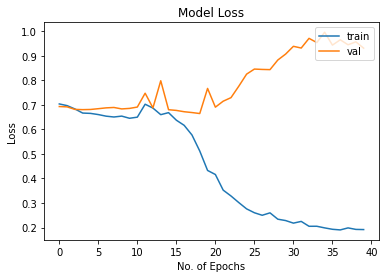

In [ ]:
# summarize history for loss
plt.plot(H0.history['loss'])
plt.plot(H0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='upper right')
#plt.savefig('graph3.pdf')
#from google.colab import files
#files.download('graph3.pdf')
plt.show()

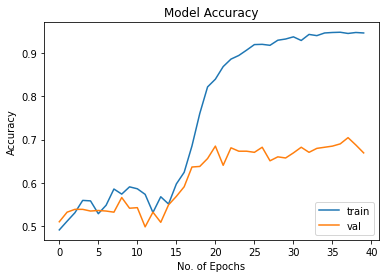

In [ ]:
# summarize history for accuracy
plt.plot(H0.history['categorical_accuracy'])
plt.plot(H0.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='lower right')
#plt.savefig('graph4.pdf')
#from google.colab import files
#files.download('graph4.pdf')
plt.show()

### ***Metal***

In [ ]:
# 2 Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in df['genre'].unique() :
  if i.lower() == 'metal':
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:1600]
  else :
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:160]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))


# Changing problem to one-vs-all
for i in df_subset.index:
  if df_subset.loc[i,'genre'].lower() != 'metal':
    df_subset.loc[i,'genre'] = 'NotMetal'

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_subset['genre_code'] = lb_make.fit_transform(df_subset['genre'])
df_subset.head()

No. of records in smaller sample =  3200


,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics,genre_code
0,137949,weight-beneath-my-sin,2013,five-finger-death-punch,Metal,you stole my life you've taken everything left...,"['stole', 'life', ""'ve"", 'taken', 'everything'...","['stole', 'life', ""'ve"", 'taken', 'everyth', '...","['weight', 'beneath', 'my', 'sin']",weight beneath my sin,steal life have take everythe left die wonder ...,"['steal', 'life', 'have', 'take', 'everythe', ...",149,540,149,0,steal life have take everythe left die wonder ...,0
1,124753,tis-the-sound-of-tempest-that-drowns-us-out,2007,enochian-crescent,Metal,raged and burned longer than the stars in the ...,"['raged', 'burned', 'longer', 'stars', 'sky', ...","['rage', 'burn', 'longer', 'star', 'sky', 'fie...","['tis', 'the', 'sound', 'of', 'tempest', 'that...",ti the sound of tempest that drown u out,rage burn longer star sky fiend shall conquer ...,"['rage', 'burn', 'longer', 'star', 'sky', 'fie...",92,485,92,0,rage burn longer star sky fiend shall conquer ...,0
2,169481,have-fun,2006,beautiful-south,NotMetal,have fun and if you can't have fun have someon...,"['fun', 'ca', ""n't"", 'fun', 'someone', 'else',...","['fun', 'ca', ""n't"", 'fun', 'someon', 'els', ""...","['have', 'fun']",have fun,fun ca be fun someone else be fun 'cause someo...,"['fun', 'ca', 'be', 'someone', 'else', ""'cause...",144,658,144,0,fun ca be fun someone else be fun because some...,1
3,139819,love-makes-things-happen,2006,babyface,NotMetal,deep in the heart love has many ways of touchi...,"['deep', 'heart', 'love', 'many', 'ways', 'tou...","['deep', 'heart', 'love', 'mani', 'way', 'touc...","['love', 'makes', 'things', 'happen']",love make thing happen,deep heart love many way touch emotion take co...,"['deep', 'heart', 'love', 'many', 'way', 'touc...",302,1265,302,0,deep heart love many way touch emotion take co...,1
4,85505,no-others,2007,full-blown-chaos,Metal,true till the end you can never bring us down ...,"['true', 'till', 'end', 'never', 'bring', 'us'...","['true', 'till', 'end', 'never', 'bring', 'us'...","['no', 'others']",no other,true till end never bring u even hard try talk...,"['true', 'till', 'end', 'never', 'bring', 'u',...",54,242,54,0,true till end never bring you even hard try ta...,0


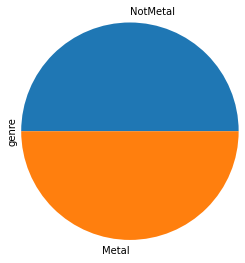

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df_subset['genre'].value_counts().plot.pie(radius=1.25)

In [ ]:
# 4 - extracting the required columns
df_subset['expanded_lyrics'].fillna(value=' ',inplace =True)
X = df_subset['expanded_lyrics']
Y = df_subset['genre_code']


# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

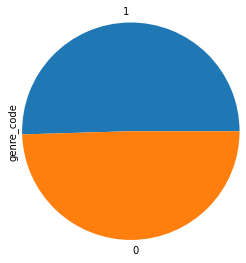

In [ ]:
# Showing a pie-chart of all the genres in the dataset
Y_test.value_counts().plot.pie(radius=1.25)

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train[1]

"rage burn longer star sky fiend shall conquer turn away head blacken shatter terrible sublime man source downfall splinter rock rise hurricane break bond blood lie humanity ride fiend sun soul soar upward tomorrow burn tomb madnes black eye flame hair wear smile kingdom incandescent brimstone charcoal sky mankind pluck eye rotten mouth wear frown kingdom whisper wind mild breeze brow dead 't sound tempest drown you cremation grind ensnare murder flame protrude tongue lick smoulder flesh world burn afire churn alloce allure funeral fire fure sound tempest cry tempt drown you"

In [ ]:
vocab_size = 30000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]


In [ ]:
print(X_train[1])

[16762, 2899, 22086, 5831, 2032, 29063, 12204, 2032, 1204, 12204, 2032, 20103, 12204, 29063, 22457, 434, 16709, 3783, 29394, 11857, 20789, 8493, 3612, 9138, 20204, 29676, 27754, 7937, 19960, 27076, 3612, 21764, 1710, 19140, 19730, 26912, 17783, 1719]


In [ ]:
max_length = 250
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
X_train[1]

array([16762,  2899, 22086,  5831,  2032, 29063, 12204,  2032,  1204,
       12204,  2032, 20103, 12204, 29063, 22457,   434, 16709,  3783,
       29394, 11857, 20789,  8493,  3612,  9138, 20204, 29676, 27754,
        7937, 19960, 27076,  3612, 21764,  1710, 19140, 19730, 26912,
       17783,  1719,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
#for 
training_padded = np.array(X_train)
training_padded = np.array(training_padded)
training_labels = np.array(Y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(Y_test)
from keras.utils import np_utils

testing_labels_en = np_utils.to_categorical(testing_labels)
training_labels_en = np_utils.to_categorical(training_labels)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout,GRU, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
model0 = 0

In [ ]:
model0 = Sequential()
model0.add(Embedding(vocab_size,100,input_length = max_length))
#model0.add(SimpleRNN(16))
model0.add(LSTM(32, return_sequences=False,dropout=0.5))
#model0.add(GRU(8, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(32, activation='sigmoid')) 
model0.add(Dense(2, activation='softmax'))
#from keras.optimizers import Adagrad
#opt = Adagrad(learning_rate=1)

In [ ]:
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model0.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 250, 100)          3000000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 66        
Total params: 3,018,146
Trainable params: 3,018,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.shape(training_padded)

(2560, 250)

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=40,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/40
112/112 [==============================] - 16s 126ms/step - loss: 0.7353 - categorical_accuracy: 0.5212 - val_loss: 0.6879 - val_categorical_accuracy: 0.5273
Epoch 2/40
112/112 [==============================] - 14s 123ms/step - loss: 0.6801 - categorical_accuracy: 0.5229 - val_loss: 0.6825 - val_categorical_accuracy: 0.5286
Epoch 3/40
112/112 [==============================] - 14s 121ms/step - loss: 0.6717 - categorical_accuracy: 0.5419 - val_loss: 0.6806 - val_categorical_accuracy: 0.5130
Epoch 4/40
112/112 [==============================] - 14s 122ms/step - loss: 0.6692 - categorical_accuracy: 0.5346 - val_loss: 0.6829 - val_categorical_accuracy: 0.5299
Epoch 5/40
112/112 [==============================] - 14s 122ms/step - loss: 0.6667 - categorical_accuracy: 0.5379 - val_loss: 0.6862 - val_categorical_accuracy: 0.5234
Epoch 6/40
112/112 [==============================] - 14s 123ms/step - loss: 0.6889 - categorical_accuracy: 0.5469 - val_loss: 0.6789 - val_categorical_acc

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=30,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/30
112/112 [==============================] - 14s 122ms/step - loss: 0.5911 - categorical_accuracy: 0.6228 - val_loss: 0.6659 - val_categorical_accuracy: 0.5286
Epoch 2/30
112/112 [==============================] - 13s 120ms/step - loss: 0.5877 - categorical_accuracy: 0.6300 - val_loss: 0.6591 - val_categorical_accuracy: 0.6133
Epoch 3/30
112/112 [==============================] - 14s 122ms/step - loss: 0.5906 - categorical_accuracy: 0.6200 - val_loss: 0.6571 - val_categorical_accuracy: 0.6211
Epoch 4/30
112/112 [==============================] - 14s 124ms/step - loss: 0.5848 - categorical_accuracy: 0.6211 - val_loss: 0.6562 - val_categorical_accuracy: 0.6211
Epoch 5/30
112/112 [==============================] - 14s 121ms/step - loss: 0.5848 - categorical_accuracy: 0.6311 - val_loss: 0.6311 - val_categorical_accuracy: 0.6979
Epoch 6/30
112/112 [==============================] - 14s 123ms/step - loss: 0.5479 - categorical_accuracy: 0.7037 - val_loss: 0.6435 - val_categorical_acc

In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.6171875
Precision: 0.7196513291663529
Recall: 0.613945561621627
F1-score: 0.5632007799986071


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       317
           1       0.76      0.80      0.78       323

    accuracy                           0.78       640
   macro avg       0.78      0.77      0.77       640
weighted avg       0.78      0.78      0.77       640



In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.775
Precision: 0.7758805009856904
Recall: 0.7747165278198279
F1-score: 0.774683148177124


In [ ]:
_, accuracy = model0.evaluate(testing_padded, testing_labels_en, verbose=1)
print(accuracy)

20/20 [==============================] - 1s 27ms/step - loss: 0.6121 - categorical_accuracy: 0.7750
0.7749999761581421


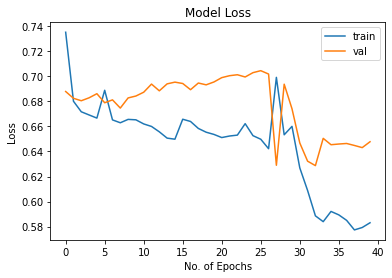

In [ ]:
# summarize history for loss
plt.plot(H0.history['loss'])
plt.plot(H0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='upper right')
#plt.savefig('graph3.pdf')
#from google.colab import files
#files.download('graph3.pdf')
plt.show()

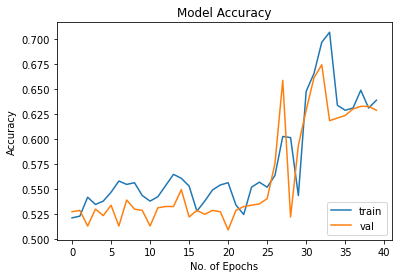

In [ ]:
# summarize history for accuracy
plt.plot(H0.history['categorical_accuracy'])
plt.plot(H0.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='lower right')
#plt.savefig('graph4.pdf')
#from google.colab import files
#files.download('graph4.pdf')
plt.show()

### ***Other***

In [ ]:
# 2 Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in df['genre'].unique() :
  if i.lower() == 'other':
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:1600]
  else :
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:160]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))


# Changing problem to one-vs-all
for i in df_subset.index:
  if df_subset.loc[i,'genre'].lower() != 'other':
    df_subset.loc[i,'genre'] = 'NotOther'

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_subset['genre_code'] = lb_make.fit_transform(df_subset['genre'])
df_subset.head()

No. of records in smaller sample =  3200


,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics,genre_code
0,188654,atlanta-on-fire,2010,eminem,NotOther,eminem stat stat quo again easin to it next st...,"['eminem', 'stat', 'stat', 'quo', 'easin', 'ne...","['eminem', 'stat', 'stat', 'quo', 'easin', 'ne...","['atlanta', 'on', 'fire']",atlanta on fire,eminem stat stat quo easin next stat quo im ne...,"['eminem', 'stat', 'quo', 'easin', 'next', 'im...",171,766,171,2,eminem stat stat quo easin next stat quo I am ...,0
1,179833,all-i-want-is-you,2016,betty-harris,Other,all i want is you wait a minute you know it fe...,"['want', 'wait', 'minute', 'know', 'feels', 'r...","['want', 'wait', 'minut', 'know', 'feel', 'rig...","['all', 'i', 'want', 'is', 'you']",all i want be you,want wait minute know feel right wait minute l...,"['want', 'wait', 'minute', 'know', 'feel', 'ri...",118,518,118,0,want wait minute know feel right wait minute l...,1
2,114157,first-snow-in-kokomo,2015,aretha-franklin,NotOther,first snow in kokomo the first snow in kokomo...,"['first', 'snow', 'kokomo', 'first', 'snow', '...","['first', 'snow', 'kokomo', 'first', 'snow', '...","['first', 'snow', 'in', 'kokomo']",first snow in kokomo,first snow kokomo first snow kokomo indiana hi...,"['first', 'snow', 'kokomo', 'indiana', 'highwa...",106,495,106,1,first snow kokomo first snow kokomo indiana hi...,0
3,14334,a-letter-to-myself,2006,the-chi-lites,NotOther,write a letter write another letter write a le...,"['write', 'letter', 'write', 'another', 'lette...","['write', 'letter', 'write', 'anoth', 'letter'...","['a', 'letter', 'to', 'myself']",a letter to myself,write letter write another letter write letter...,"['write', 'letter', 'another', 'be', 'seal', '...",347,1817,347,0,write letter write another letter write letter...,0
4,176845,make-it-so-a-star-trek-parody-of-let-it-go,2016,debs-and-errol,Other,make it so a let it go parody by debs and erro...,"['make', 'let', 'go', 'parody', 'debs', 'errol...","['make', 'let', 'go', 'parodi', 'deb', 'errol'...","['make', 'it', 'so', 'a', 'star', 'trek', 'par...",make it so a star trek parody of let it go,make let go parody deb errol starship fly eart...,"['make', 'let', 'go', 'parody', 'deb', 'errol'...",147,638,147,0,make let go parody deb errol starship fly eart...,1


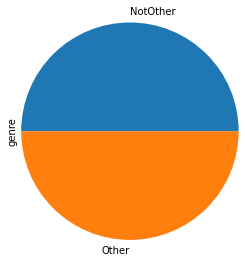

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df_subset['genre'].value_counts().plot.pie(radius=1.25)

In [ ]:
# 4 - extracting the required columns
df_subset['expanded_lyrics'].fillna(value=' ',inplace =True)
X = df_subset['expanded_lyrics']
Y = df_subset['genre_code']


# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

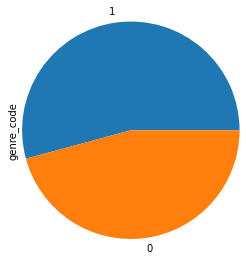

In [ ]:
# Showing a pie-chart of all the genres in the dataset
Y_test.value_counts().plot.pie(radius=1.25)

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train[100]

'afraid thing ca be change one be blame weakness remain be be let sink get find word be forget be let blink wan na savour every moment tell ever wake think ever wonder feel know can end come time be late say goodbye say goodbye ca be lie awake ca be live fear be ahead will take every chance end end be let sink get find word be forget be let blink wan na savour every moment tell ever wake think ever wonder feel know can end come time be late say goodbye let be let be make happen might last chance be late push limit drop doubt take control life be let sink get find word be forget be let blink wan na savour every moment tell ever wake think ever wonder feel know can end come time be late say goodbye say goodbye'

In [ ]:
vocab_size = 30000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]


In [ ]:
print(X_train[100])

[9444, 250, 9444, 250, 20103, 20103, 9444, 250, 9444, 250, 20103, 20103, 6806, 250, 27206, 3755, 29360, 18998, 10777, 3172, 3867, 3612, 250, 8076, 29982, 8597, 2749, 18555, 559, 29360, 16539, 11340, 8807, 17281, 3612, 1368, 17655, 3534, 14481, 5518, 22592, 14456, 8858, 4802, 11850, 3636, 13198, 21351, 18773, 522, 3612, 28196, 23628, 3612, 21904, 6119, 3612, 18406, 3612, 18406, 3677, 16762, 29360, 29915, 27380, 9444, 250, 9444, 250, 20103, 20103, 9444, 250, 20103, 20103, 3066, 8806, 4757, 5729, 28651, 3747, 3612, 25466, 3612, 25466, 25466, 25466, 25466, 559, 29360, 28196, 23628, 3612, 21904, 6119, 3612, 18406, 3612, 18406, 16762, 29360, 29915, 27380, 9444, 250, 9444, 250, 20103, 20103, 9444, 250, 9444, 250, 20103, 20103, 9444, 250, 9444, 250, 20103, 20103, 20103, 20103]


In [ ]:
max_length = 250
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
X_train[100]

array([ 9444,   250,  9444,   250, 20103, 20103,  9444,   250,  9444,
         250, 20103, 20103,  6806,   250, 27206,  3755, 29360, 18998,
       10777,  3172,  3867,  3612,   250,  8076, 29982,  8597,  2749,
       18555,   559, 29360, 16539, 11340,  8807, 17281,  3612,  1368,
       17655,  3534, 14481,  5518, 22592, 14456,  8858,  4802, 11850,
        3636, 13198, 21351, 18773,   522,  3612, 28196, 23628,  3612,
       21904,  6119,  3612, 18406,  3612, 18406,  3677, 16762, 29360,
       29915, 27380,  9444,   250,  9444,   250, 20103, 20103,  9444,
         250, 20103, 20103,  3066,  8806,  4757,  5729, 28651,  3747,
        3612, 25466,  3612, 25466, 25466, 25466, 25466,   559, 29360,
       28196, 23628,  3612, 21904,  6119,  3612, 18406,  3612, 18406,
       16762, 29360, 29915, 27380,  9444,   250,  9444,   250, 20103,
       20103,  9444,   250,  9444,   250, 20103, 20103,  9444,   250,
        9444,   250, 20103, 20103, 20103, 20103,     0,     0,     0,
           0,     0,

In [ ]:
#for 
training_padded = np.array(X_train)
training_padded = np.array(training_padded)
training_labels = np.array(Y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(Y_test)
from keras.utils import np_utils

testing_labels_en = np_utils.to_categorical(testing_labels)
training_labels_en = np_utils.to_categorical(training_labels)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout,GRU, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
model0 = 0

In [ ]:
model0 = Sequential()
model0.add(Embedding(vocab_size,100,input_length = max_length))
#model0.add(SimpleRNN(16))
model0.add(LSTM(32, return_sequences=False,dropout=0.5))
#model0.add(GRU(8, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(32, activation='sigmoid')) 
model0.add(Dense(2, activation='softmax'))
#from keras.optimizers import Adagrad
#opt = Adagrad(learning_rate=1)

In [ ]:
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model0.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 250, 100)          3000000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 66        
Total params: 3,018,146
Trainable params: 3,018,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.shape(training_padded)

(2560, 250)

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=40,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/40
112/112 [==============================] - 16s 127ms/step - loss: 0.7214 - categorical_accuracy: 0.4927 - val_loss: 0.6966 - val_categorical_accuracy: 0.5221
Epoch 2/40
112/112 [==============================] - 14s 122ms/step - loss: 0.6956 - categorical_accuracy: 0.5017 - val_loss: 0.6941 - val_categorical_accuracy: 0.5195
Epoch 3/40
112/112 [==============================] - 14s 121ms/step - loss: 0.6875 - categorical_accuracy: 0.5279 - val_loss: 0.6935 - val_categorical_accuracy: 0.5208
Epoch 4/40
112/112 [==============================] - 14s 124ms/step - loss: 0.6730 - categorical_accuracy: 0.5530 - val_loss: 0.6998 - val_categorical_accuracy: 0.4961
Epoch 5/40
112/112 [==============================] - 14s 122ms/step - loss: 0.6632 - categorical_accuracy: 0.5458 - val_loss: 0.6947 - val_categorical_accuracy: 0.5195
Epoch 6/40
112/112 [==============================] - 14s 123ms/step - loss: 0.6499 - categorical_accuracy: 0.5575 - val_loss: 0.7071 - val_categorical_acc

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=30,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/30
112/112 [==============================] - 14s 124ms/step - loss: 0.3848 - categorical_accuracy: 0.8030 - val_loss: 1.1481 - val_categorical_accuracy: 0.5469
Epoch 2/30
112/112 [==============================] - 14s 123ms/step - loss: 0.3552 - categorical_accuracy: 0.8153 - val_loss: 1.1297 - val_categorical_accuracy: 0.5495
Epoch 3/30
112/112 [==============================] - 14s 124ms/step - loss: 0.3416 - categorical_accuracy: 0.8259 - val_loss: 1.1634 - val_categorical_accuracy: 0.5430
Epoch 4/30
112/112 [==============================] - 14s 125ms/step - loss: 0.3386 - categorical_accuracy: 0.8225 - val_loss: 1.1551 - val_categorical_accuracy: 0.5365
Epoch 5/30
112/112 [==============================] - 14s 122ms/step - loss: 0.3309 - categorical_accuracy: 0.8359 - val_loss: 1.2441 - val_categorical_accuracy: 0.5417
Epoch 6/30
112/112 [==============================] - 14s 123ms/step - loss: 0.3334 - categorical_accuracy: 0.8376 - val_loss: 1.1019 - val_categorical_acc

In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.5234375
Precision: 0.5046933667083855
Recall: 0.5036883673810624
F1-score: 0.48396784316006247


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.27      0.34       293
           1       0.54      0.74      0.63       347

    accuracy                           0.52       640
   macro avg       0.50      0.50      0.48       640
weighted avg       0.51      0.52      0.50       640



In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.5125
Precision: 0.5115826909360925
Recall: 0.5116601587473322
F1-score: 0.5111202514910245


In [ ]:
_, accuracy = model0.evaluate(testing_padded, testing_labels_en, verbose=1)
print(accuracy)

20/20 [==============================] - 56s 25ms/step - loss: 1.9431 - categorical_accuracy: 0.5125
0.512499988079071


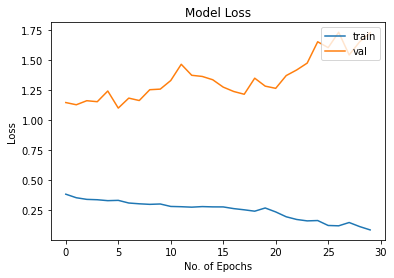

In [ ]:
# summarize history for loss
plt.plot(H0.history['loss'])
plt.plot(H0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='upper right')
#plt.savefig('graph3.pdf')
#from google.colab import files
#files.download('graph3.pdf')
plt.show()

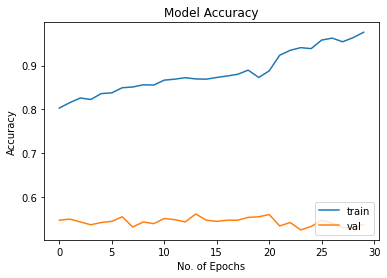

In [ ]:
# summarize history for accuracy
plt.plot(H0.history['categorical_accuracy'])
plt.plot(H0.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='lower right')
#plt.savefig('graph4.pdf')
#from google.colab import files
#files.download('graph4.pdf')
plt.show()

### ***Pop***

In [ ]:
# 2 Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in df['genre'].unique() :
  if i.lower() == 'pop':
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:1600]
  else :
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:160]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))


# Changing problem to one-vs-all
for i in df_subset.index:
  if df_subset.loc[i,'genre'].lower() != 'pop':
    df_subset.loc[i,'genre'] = 'NotPop'

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_subset['genre_code'] = lb_make.fit_transform(df_subset['genre'])
df_subset.head()

No. of records in smaller sample =  3200


,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics,genre_code
0,22708,i-ll-string-along-with-you,2014,clifford-brown,NotPop,all my life i've waited for an angel but no an...,"['life', ""'ve"", 'waited', 'angel', 'angel', 'e...","['life', ""'ve"", 'wait', 'angel', 'angel', 'eve...","['i', 'll', 'string', 'along', 'with', 'you']",i ll string along with you,life have wait angel angel ever come along one...,"['life', 'have', 'wait', 'angel', 'ever', 'com...",100,431,100,0,life have wait angel angel ever come along one...,0
1,106574,feelin-so-hood,2011,araabmuzik,NotPop,got a feeling so high you're held against the ...,"['got', 'feeling', 'high', ""'re"", 'held', 'tim...","['got', 'feel', 'high', ""'re"", 'held', 'time',...","['feelin', 'so', 'hood']",feelin so hood,get feel high be hold time get feel high be ho...,"['get', 'feel', 'high', 'be', 'hold', 'time', ...",195,753,195,0,get feel high be hold time get feel high be ho...,0
2,128728,house-in-virginia,2006,brendan-benson,Pop,house in virginia we love to see you emma red ...,"['house', 'virginia', 'love', 'see', 'emma', '...","['hous', 'virginia', 'love', 'see', 'emma', 'r...","['house', 'in', 'virginia']",house in virginia,house virginia love see emma red velvet chair ...,"['house', 'virginia', 'love', 'see', 'emma', '...",83,402,83,0,house virginia love see emma red velvet chair ...,1
3,133551,double-feature,2007,camera-obscura,Pop,close comes this winter summer is no longer an...,"['close', 'comes', 'winter', 'summer', 'longer...","['close', 'come', 'winter', 'summer', 'longer'...","['double', 'feature']",double feature,close come winter summer longer thing seem muc...,"['close', 'come', 'winter', 'summer', 'longer'...",37,198,37,0,close come winter summer longer thing seem muc...,1
4,102130,a-waiting-time,2006,autumn,NotPop,opening the doors opening the rooms to us a ho...,"['opening', 'doors', 'opening', 'rooms', 'us',...","['open', 'door', 'open', 'room', 'us', 'hope',...","['a', 'waiting', 'time']",a wait time,open door open room u hope transcend deaden co...,"['open', 'door', 'room', 'u', 'hope', 'transce...",96,461,96,0,open door open room you hope transcend deaden ...,0


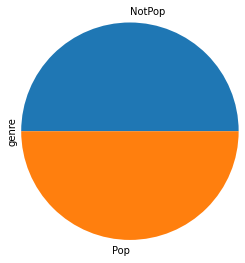

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df_subset['genre'].value_counts().plot.pie(radius=1.25)

In [ ]:
# 4 - extracting the required columns
df_subset['expanded_lyrics'].fillna(value=' ',inplace =True)
X = df_subset['expanded_lyrics']
Y = df_subset['genre_code']


# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

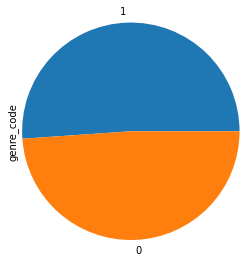

In [ ]:
# Showing a pie-chart of all the genres in the dataset
Y_test.value_counts().plot.pie(radius=1.25)

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train[1]

'get feel high be hold time get feel high be hold time chase night divine say tongue tie ooh be know ca be come vine ooh somethe line ooh come vine ooh somethe line ooh back back back time know tongue tie ooh be know ca be come vine ooh somethe line ooh come vine ooh somethe line ooh back back back time know get feel high be hold time get feel high be hold time feel high sweet better time feel high sweet better time tongue tie ooh be know ca be come vine ooh somethe line ooh come vine ooh somethe line ooh back back back time know tongue tie ooh be know ca be come vine ooh somethe line ooh come vine ooh somethe line ooh back back back time know tongue tie ooh be know ca be come vine ooh somethe line ooh come vine ooh somethe line ooh back back back time know get feel high be hold time get feel high be hold time feel high sweet better time feel high sweet better time get feel high be hold time chase night divine say lyric write g you have'

In [ ]:
vocab_size = 30000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]


In [ ]:
print(X_train[1])

[27585, 3612, 14456, 18848, 29909, 17754, 13262, 27585, 3612, 14456, 4802, 6543, 21416, 9291, 17754, 9291, 7795, 4957, 21904, 26592, 3612, 27585, 3612, 14456, 12017, 7002, 28196, 27585, 3612, 14456, 21351, 28196, 11663, 8807, 29360, 29360, 18624, 7450, 7450, 13262, 3607, 1766, 18773, 14456, 522, 2032, 26668, 24075, 24075, 3811, 27585, 5277, 11304, 25041, 2901, 29360, 29360, 18624, 7450, 7450, 13262, 26908, 18680, 7772, 18848, 22225, 24148, 20160, 27585, 3612, 14456, 12017, 7002, 28196, 27585, 3612, 14456, 21351, 28196, 11663, 8807]


In [ ]:
max_length = 250
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
X_train[1]

array([27585,  3612, 14456, 18848, 29909, 17754, 13262, 27585,  3612,
       14456,  4802,  6543, 21416,  9291, 17754,  9291,  7795,  4957,
       21904, 26592,  3612, 27585,  3612, 14456, 12017,  7002, 28196,
       27585,  3612, 14456, 21351, 28196, 11663,  8807, 29360, 29360,
       18624,  7450,  7450, 13262,  3607,  1766, 18773, 14456,   522,
        2032, 26668, 24075, 24075,  3811, 27585,  5277, 11304, 25041,
        2901, 29360, 29360, 18624,  7450,  7450, 13262, 26908, 18680,
        7772, 18848, 22225, 24148, 20160, 27585,  3612, 14456, 12017,
        7002, 28196, 27585,  3612, 14456, 21351, 28196, 11663,  8807,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
#for 
training_padded = np.array(X_train)
training_padded = np.array(training_padded)
training_labels = np.array(Y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(Y_test)
from keras.utils import np_utils

testing_labels_en = np_utils.to_categorical(testing_labels)
training_labels_en = np_utils.to_categorical(training_labels)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout,GRU, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
model0 = 0

In [ ]:
model0 = Sequential()
model0.add(Embedding(vocab_size,100,input_length = max_length))
#model0.add(SimpleRNN(16))
model0.add(LSTM(64, return_sequences=False,dropout=0.5))
#model0.add(GRU(8, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(64, activation='sigmoid')) 
model0.add(Dense(2, activation='softmax'))
#from keras.optimizers import Adagrad
#opt = Adagrad(learning_rate=1)

In [ ]:
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model0.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 250, 100)          3000000   
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                42240     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 130       
Total params: 3,046,530
Trainable params: 3,046,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.shape(training_padded)

(2560, 250)

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=40,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/40
112/112 [==============================] - 20s 163ms/step - loss: 0.6950 - categorical_accuracy: 0.4933 - val_loss: 0.6931 - val_categorical_accuracy: 0.5039
Epoch 2/40
112/112 [==============================] - 18s 157ms/step - loss: 0.6960 - categorical_accuracy: 0.5084 - val_loss: 0.6941 - val_categorical_accuracy: 0.4961
Epoch 3/40
112/112 [==============================] - 18s 158ms/step - loss: 0.6912 - categorical_accuracy: 0.5140 - val_loss: 0.6899 - val_categorical_accuracy: 0.5221
Epoch 4/40
112/112 [==============================] - 18s 159ms/step - loss: 0.7015 - categorical_accuracy: 0.5011 - val_loss: 0.6932 - val_categorical_accuracy: 0.5169
Epoch 5/40
112/112 [==============================] - 18s 158ms/step - loss: 0.6830 - categorical_accuracy: 0.5363 - val_loss: 0.6829 - val_categorical_accuracy: 0.5964
Epoch 6/40
112/112 [==============================] - 18s 159ms/step - loss: 0.6644 - categorical_accuracy: 0.5759 - val_loss: 0.6794 - val_categorical_acc

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=30,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/30
112/112 [==============================] - 15s 133ms/step - loss: 0.2622 - categorical_accuracy: 0.9035 - val_loss: 1.1888 - val_categorical_accuracy: 0.5885
Epoch 2/30
112/112 [==============================] - 15s 132ms/step - loss: 0.2705 - categorical_accuracy: 0.8984 - val_loss: 1.3471 - val_categorical_accuracy: 0.5833
Epoch 3/30
112/112 [==============================] - 15s 134ms/step - loss: 0.2647 - categorical_accuracy: 0.9012 - val_loss: 1.3224 - val_categorical_accuracy: 0.5846
Epoch 4/30
112/112 [==============================] - 15s 134ms/step - loss: 0.2581 - categorical_accuracy: 0.9040 - val_loss: 1.4334 - val_categorical_accuracy: 0.5781
Epoch 5/30
112/112 [==============================] - 15s 134ms/step - loss: 0.2598 - categorical_accuracy: 0.9035 - val_loss: 1.3608 - val_categorical_accuracy: 0.5990
Epoch 6/30
112/112 [==============================] - 15s 132ms/step - loss: 0.2535 - categorical_accuracy: 0.9040 - val_loss: 1.2735 - val_categorical_acc

In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.5953125
Precision: 0.596676618478944
Recall: 0.5961788355756172
F1-score: 0.5950267644895935


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.27      0.41       317
           1       0.57      0.96      0.72       323

    accuracy                           0.62       640
   macro avg       0.72      0.61      0.56       640
weighted avg       0.72      0.62      0.56       640



In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.5859375
Precision: 0.5875649504015116
Recall: 0.5869361315473225
F1-score: 0.5854912149066744


In [ ]:
_, accuracy = model0.evaluate(testing_padded, testing_labels_en, verbose=1)
print(accuracy)

20/20 [==============================] - 1s 32ms/step - loss: 1.1752 - categorical_accuracy: 0.5859
0.5859375


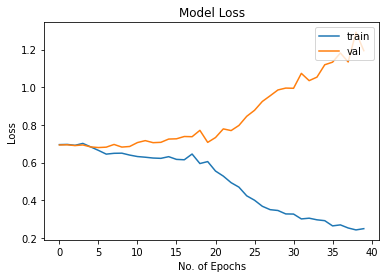

In [ ]:
# summarize history for loss
plt.plot(H0.history['loss'])
plt.plot(H0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='upper right')
#plt.savefig('graph3.pdf')
#from google.colab import files
#files.download('graph3.pdf')
plt.show()

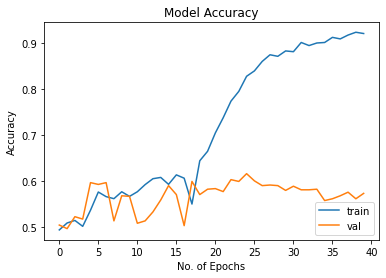

In [ ]:
# summarize history for accuracy
plt.plot(H0.history['categorical_accuracy'])
plt.plot(H0.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='lower right')
#plt.savefig('graph4.pdf')
#from google.colab import files
#files.download('graph4.pdf')
plt.show()

### ***R&B***

In [ ]:
# 2 Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in df['genre'].unique() :
  if i.lower() == 'r&b':
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:1600]
  else :
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:160]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))


# Changing problem to one-vs-all
for i in df_subset.index:
  if df_subset.loc[i,'genre'].lower() != 'r&b':
    df_subset.loc[i,'genre'] = 'NotR&B'

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_subset['genre_code'] = lb_make.fit_transform(df_subset['genre'])
df_subset.head()

No. of records in smaller sample =  3200


,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics,genre_code
0,63171,on-and-off,2008,david-ruffin,R&B,from day to day you keep me guessing whether y...,"['day', 'day', 'keep', 'guessing', 'whether', ...","['day', 'day', 'keep', 'guess', 'whether', ""'r...","['on', 'and', 'off']",on and off,day day keep guess whether be mine ooh baby so...,"['day', 'keep', 'guess', 'whether', 'be', 'min...",146,669,146,0,day day keep guess whether be mine ooh baby so...,1
1,164275,self-esteem,2015,andrew-jackson-jihad,R&B,this place is taking all my self esteem and ev...,"['place', 'taking', 'self', 'esteem', 'everybo...","['place', 'take', 'self', 'esteem', 'everybodi...","['self', 'esteem']",self esteem,place take self esteem everybody afraid ca be ...,"['place', 'take', 'self', 'esteem', 'everybody...",52,271,52,0,place take self esteem everybody afraid ca be ...,1
2,143932,i-can-t-go-on,2015,fats-domino,R&B,rosalie come back to me rosalie come back to m...,"['rosalie', 'come', 'back', 'rosalie', 'come',...","['rosali', 'come', 'back', 'rosali', 'come', '...","['i', 'can', 't', 'go', 'on']",i can t go on,rosalie come back rosalie come back be reel be...,"['rosalie', 'come', 'back', 'be', 'reel', 'roc...",82,345,82,0,rosalie come back rosalie come back be reel be...,1
3,87435,another-good-reason,2006,alan-jackson,NotR&B,i woke up the other night lyin on the floor ju...,"['woke', 'night', 'lyin', 'floor', 'said', 'sa...","['woke', 'night', 'lyin', 'floor', 'said', 'sa...","['another', 'good', 'reason']",another good reason,wake night lyin floor say say `` name be julie...,"['wake', 'night', 'lyin', 'floor', 'say', '``'...",173,703,173,0,wake night lyin floor say say `` name be julie...,0
4,86679,american-supermodel,2016,american-supermodel,NotR&B,verse american supermodel she got looks that k...,"['verse', 'american', 'supermodel', 'got', 'lo...","['vers', 'american', 'supermodel', 'got', 'loo...","['american', 'supermodel']",american supermodel,verse american supermodel get look kill yeah b...,"['verse', 'american', 'supermodel', 'get', 'lo...",69,382,69,0,verse american supermodel get look kill yeah b...,0


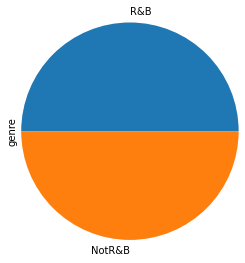

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df_subset['genre'].value_counts().plot.pie(radius=1.25)

In [ ]:
# 4 - extracting the required columns
df_subset['expanded_lyrics'].fillna(value=' ',inplace =True)
X = df_subset['expanded_lyrics']
Y = df_subset['genre_code']


# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

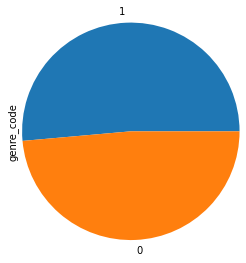

In [ ]:
# Showing a pie-chart of all the genres in the dataset
Y_test.value_counts().plot.pie(radius=1.25)

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train[1]

'place take self esteem everybody afraid ca be make eye contact anyone see place take self esteem everybody afraid be afraid go street reminder failure everywhere everybody afraid people freak people make scare people make damn self aware get bronchiti twice year least lung be way smoke motherfuck chimney declare war body'

In [ ]:
vocab_size = 30000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]


In [ ]:
print(X_train[1])

[7603, 28890, 6446, 22597, 27694, 20763, 3811, 8854, 3564, 10447, 3636, 5722, 3612, 3612, 23134, 6446, 16945, 717, 11451, 21841, 16945, 5478, 14984, 28663, 8553, 21351, 3986, 4802, 15937, 28552, 21351, 17783, 6908, 20514, 29750, 22851, 15316, 3612, 3456, 3811, 20763, 10791, 21515, 2731, 28541, 3608, 3811, 3612, 18998, 13198, 14340, 17679, 17655, 29982, 3612, 1447, 18964, 27753, 717, 2570, 3612, 12058, 1447, 28385, 24111, 24598, 20514, 29750, 27753, 717, 4840, 22851, 15316, 22851, 15316]


In [ ]:
max_length = 250
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
X_train[1]

array([16762,  2899, 22086,  5831,  2032, 29063, 12204,  2032,  1204,
       12204,  2032, 20103, 12204, 29063, 22457,   434, 16709,  3783,
       29394, 11857, 20789,  8493,  3612,  9138, 20204, 29676, 27754,
        7937, 19960, 27076,  3612, 21764,  1710, 19140, 19730, 26912,
       17783,  1719,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
#for 
training_padded = np.array(X_train)
training_padded = np.array(training_padded)
training_labels = np.array(Y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(Y_test)
from keras.utils import np_utils

testing_labels_en = np_utils.to_categorical(testing_labels)
training_labels_en = np_utils.to_categorical(training_labels)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout,GRU, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
model0 = 0

In [ ]:
model0 = Sequential()
model0.add(Embedding(vocab_size,100,input_length = max_length))
#model0.add(SimpleRNN(16))
model0.add(LSTM(32, return_sequences=False,dropout=0.5))
#model0.add(GRU(8, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(32, activation='sigmoid')) 
model0.add(Dense(2, activation='softmax'))
#from keras.optimizers import Adagrad
#opt = Adagrad(learning_rate=1)

In [ ]:
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model0.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 250, 100)          3000000   
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                17024     
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 66        
Total params: 3,018,146
Trainable params: 3,018,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.shape(training_padded)

(2560, 250)

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=40,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/40
112/112 [==============================] - 16s 125ms/step - loss: 0.6948 - categorical_accuracy: 0.5033 - val_loss: 0.6966 - val_categorical_accuracy: 0.4870
Epoch 2/40
112/112 [==============================] - 14s 123ms/step - loss: 0.6913 - categorical_accuracy: 0.5067 - val_loss: 0.6933 - val_categorical_accuracy: 0.4844
Epoch 3/40
112/112 [==============================] - 14s 124ms/step - loss: 0.6907 - categorical_accuracy: 0.5290 - val_loss: 0.6988 - val_categorical_accuracy: 0.4909
Epoch 4/40
112/112 [==============================] - 14s 124ms/step - loss: 0.6670 - categorical_accuracy: 0.5513 - val_loss: 0.6859 - val_categorical_accuracy: 0.5352
Epoch 5/40
112/112 [==============================] - 14s 122ms/step - loss: 0.6609 - categorical_accuracy: 0.5469 - val_loss: 0.7040 - val_categorical_accuracy: 0.4987
Epoch 6/40
112/112 [==============================] - 14s 125ms/step - loss: 0.6533 - categorical_accuracy: 0.5552 - val_loss: 0.6895 - val_categorical_acc

In [ ]:
# start training
H1 = model0.fit(training_padded,training_labels_en, epochs=30,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/30
112/112 [==============================] - 14s 124ms/step - loss: 0.5934 - categorical_accuracy: 0.6735 - val_loss: 0.7248 - val_categorical_accuracy: 0.5846
Epoch 2/30
112/112 [==============================] - 14s 121ms/step - loss: 0.5940 - categorical_accuracy: 0.6708 - val_loss: 0.7037 - val_categorical_accuracy: 0.5833
Epoch 3/30
112/112 [==============================] - 14s 122ms/step - loss: 0.5935 - categorical_accuracy: 0.6719 - val_loss: 0.7439 - val_categorical_accuracy: 0.5781
Epoch 4/30
112/112 [==============================] - 14s 123ms/step - loss: 0.5883 - categorical_accuracy: 0.6752 - val_loss: 0.7138 - val_categorical_accuracy: 0.5833
Epoch 5/30
112/112 [==============================] - 14s 123ms/step - loss: 0.5832 - categorical_accuracy: 0.6780 - val_loss: 0.7323 - val_categorical_accuracy: 0.5872
Epoch 6/30
112/112 [==============================] - 14s 121ms/step - loss: 0.5761 - categorical_accuracy: 0.6842 - val_loss: 0.7413 - val_categorical_acc

In [ ]:
# start training
H2 = model0.fit(training_padded,training_labels_en, epochs=20,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/20
112/112 [==============================] - 14s 126ms/step - loss: 0.3639 - categorical_accuracy: 0.8270 - val_loss: 0.9013 - val_categorical_accuracy: 0.5951
Epoch 2/20
112/112 [==============================] - 14s 124ms/step - loss: 0.3496 - categorical_accuracy: 0.8309 - val_loss: 1.0391 - val_categorical_accuracy: 0.6029
Epoch 3/20
112/112 [==============================] - 14s 124ms/step - loss: 0.3365 - categorical_accuracy: 0.8371 - val_loss: 0.9845 - val_categorical_accuracy: 0.5977
Epoch 4/20
112/112 [==============================] - 14s 127ms/step - loss: 0.3295 - categorical_accuracy: 0.8387 - val_loss: 1.0319 - val_categorical_accuracy: 0.6029
Epoch 5/20
112/112 [==============================] - 14s 126ms/step - loss: 0.3229 - categorical_accuracy: 0.8415 - val_loss: 1.1057 - val_categorical_accuracy: 0.5977
Epoch 6/20
112/112 [==============================] - 14s 123ms/step - loss: 0.3130 - categorical_accuracy: 0.8449 - val_loss: 1.0078 - val_categorical_acc

In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.6203125
Precision: 0.6199324324324325
Recall: 0.6193522219724588
F1-score: 0.6193003370778266


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       311
           1       0.67      0.66      0.66       329

    accuracy                           0.66       640
   macro avg       0.66      0.66      0.66       640
weighted avg       0.66      0.66      0.66       640



In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.64375
Precision: 0.6493827930822909
Recall: 0.640389370498148
F1-score: 0.6368848542761587


In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.65625
Precision: 0.6560683760683761
Recall: 0.6561537935280837
F1-score: 0.6560854315053102


In [ ]:
_, accuracy = model0.evaluate(testing_padded, testing_labels_en, verbose=1)
print(accuracy)

20/20 [==============================] - 1s 28ms/step - loss: 1.3321 - categorical_accuracy: 0.6562
0.65625


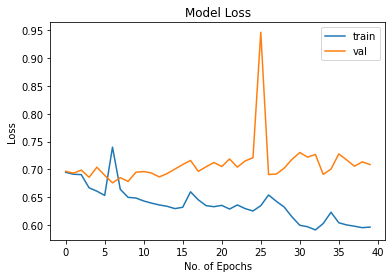

In [ ]:
# summarize history for loss
plt.plot(H0.history['loss'])
plt.plot(H0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='upper right')
#plt.savefig('graph3.pdf')
#from google.colab import files
#files.download('graph3.pdf')
plt.show()

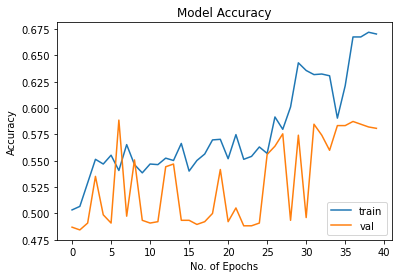

In [ ]:
# summarize history for accuracy
plt.plot(H0.history['categorical_accuracy'])
plt.plot(H0.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='lower right')
#plt.savefig('graph4.pdf')
#from google.colab import files
#files.download('graph4.pdf')
plt.show()

### ***Rock***

In [ ]:
# 2 Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in df['genre'].unique() :
  if i.lower() == 'rock':
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:1600]
  else :
    df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
    df_sample[i] = df_sample[i][:160]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))


# Changing problem to one-vs-all
for i in df_subset.index:
  if df_subset.loc[i,'genre'].lower() != 'rock':
    df_subset.loc[i,'genre'] = 'NotRock'

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_subset['genre_code'] = lb_make.fit_transform(df_subset['genre'])
df_subset.head()

No. of records in smaller sample =  3200


,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics,genre_code
0,83792,rip-it-up,2007,chuck-berry,Rock,well it's saturday night and i just got paid i...,"['well', ""'s"", 'saturday', 'night', 'got', 'pa...","['well', ""'s"", 'saturday', 'night', 'got', 'pa...","['rip', 'it', 'up']",rip it up,well be saturday night get paid be fool away m...,"['well', 'be', 'saturday', 'night', 'get', 'pa...",125,442,125,0,well be saturday night get paid be fool away m...,1
1,40595,dance-of-the-stars,2006,cast,Rock,we rarely recognize the source we barely touch...,"['rarely', 'recognize', 'source', 'barely', 't...","['rare', 'recogn', 'sourc', 'bare', 'touch', '...","['dance', 'of', 'the', 'stars']",dance of the star,rarely recognize source barely touch upon shor...,"['rarely', 'recognize', 'source', 'barely', 't...",104,466,104,0,rarely recognize source barely touch upon shor...,1
2,215511,learn-to-be-still,1994,the-eagles,Rock,it's just another day in paradise as you stumb...,"[""'s"", 'another', 'day', 'paradise', 'stumble'...","[""'s"", 'anoth', 'day', 'paradis', 'stumbl', 'b...","['learn', 'to', 'be', 'still']",learn to be still,be another day paradise stumble bed will give ...,"['be', 'another', 'day', 'paradise', 'stumble'...",92,458,92,0,be another day paradise stumble bed will give ...,1
3,25129,submarine,2015,cal-scruby,NotRock,pre hook can we drink up sink down to the bott...,"['pre', 'hook', 'drink', 'sink', 'bottom', 'oc...","['pre', 'hook', 'drink', 'sink', 'bottom', 'oc...",['submarine'],submarine,pre hook drink sink bottom ocean floor wo be b...,"['pre', 'hook', 'drink', 'sink', 'bottom', 'oc...",202,804,202,0,pre hook drink sink bottom ocean floor wo be b...,0
4,126640,generation-hexed,2006,carcass,NotRock,lost forever a whole generation of pathetic lo...,"['lost', 'forever', 'whole', 'generation', 'pa...","['lost', 'forev', 'whole', 'gener', 'pathet', ...","['generation', 'hexed']",generation hex,lose forever whole generation pathetic lose so...,"['lose', 'forever', 'whole', 'generation', 'pa...",139,880,139,0,lose forever whole generation pathetic lose so...,0


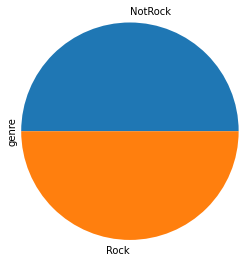

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df_subset['genre'].value_counts().plot.pie(radius=1.25)

In [ ]:
# 4 - extracting the required columns
df_subset['expanded_lyrics'].fillna(value=' ',inplace =True)
X = df_subset['expanded_lyrics']
Y = df_subset['genre_code']


# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

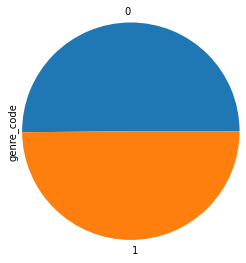

In [ ]:
# Showing a pie-chart of all the genres in the dataset
Y_test.value_counts().plot.pie(radius=1.25)

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train[1]

'rarely recognize source barely touch upon shore blind force be say be ascend have respond have see touch thing afar dance amongst star better make move make move be far away touch look see moment pass instant fall within grasp long make last be say define be draw constant line circle turn time better make move make move be far away touch be reach be shine like star altogether altogether seldom seize upon chance glimpse glance shake trance fine line divide two stand stand connect one truth get ta make move make move be far away touch ca be reach be shine like star'

In [ ]:
vocab_size = 30000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]


In [ ]:
print(X_train[1])

[26214, 18406, 27027, 3534, 18095, 19810, 5099, 17281, 3612, 22611, 10159, 3612, 8806, 7675, 3612, 2731, 25555, 29958, 28651, 11461, 9911, 13198, 2374, 10274, 16225, 21432, 25242, 29982, 2450, 4439, 4129, 3534, 5817, 27027, 16762, 17203, 24982, 25512, 3612, 18848, 13198, 2374, 10274, 16225]


In [ ]:
max_length = 250
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
X_train[1]

array([26214, 18406, 27027,  3534, 18095, 19810,  5099, 17281,  3612,
       22611, 10159,  3612,  8806,  7675,  3612,  2731, 25555, 29958,
       28651, 11461,  9911, 13198,  2374, 10274, 16225, 21432, 25242,
       29982,  2450,  4439,  4129,  3534,  5817, 27027, 16762, 17203,
       24982, 25512,  3612, 18848, 13198,  2374, 10274, 16225,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
#for 
training_padded = np.array(X_train)
training_padded = np.array(training_padded)
training_labels = np.array(Y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(Y_test)
from keras.utils import np_utils

testing_labels_en = np_utils.to_categorical(testing_labels)
training_labels_en = np_utils.to_categorical(training_labels)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout,GRU, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
model0 = 0

In [ ]:
model0 = Sequential()
model0.add(Embedding(vocab_size,100,input_length = max_length))
#model0.add(SimpleRNN(16))
model0.add(LSTM(32, return_sequences=False))
#model0.add(GRU(8, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(32, activation='sigmoid')) 
model0.add(Dense(2, activation='softmax'))
#from keras.optimizers import Adagrad
#opt = Adagrad(learning_rate=1)

In [ ]:
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model0.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 250, 100)          3000000   
_________________________________________________________________
lstm_18 (LSTM)               (None, 32)                17024     
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 66        
Total params: 3,018,146
Trainable params: 3,018,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.shape(training_padded)

(2560, 250)

In [ ]:
# start training
H0 = model0.fit(training_padded,training_labels_en, epochs=40,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/40
112/112 [==============================] - 16s 129ms/step - loss: 0.7054 - categorical_accuracy: 0.4888 - val_loss: 0.6975 - val_categorical_accuracy: 0.4896
Epoch 2/40
112/112 [==============================] - 14s 125ms/step - loss: 0.6945 - categorical_accuracy: 0.5140 - val_loss: 0.6963 - val_categorical_accuracy: 0.4909
Epoch 3/40
112/112 [==============================] - 14s 124ms/step - loss: 0.6842 - categorical_accuracy: 0.5458 - val_loss: 0.6781 - val_categorical_accuracy: 0.5104
Epoch 4/40
112/112 [==============================] - 14s 124ms/step - loss: 0.6666 - categorical_accuracy: 0.5441 - val_loss: 0.6774 - val_categorical_accuracy: 0.5430
Epoch 5/40
112/112 [==============================] - 14s 123ms/step - loss: 0.6559 - categorical_accuracy: 0.5564 - val_loss: 0.6748 - val_categorical_accuracy: 0.5417
Epoch 6/40
112/112 [==============================] - 14s 122ms/step - loss: 0.6537 - categorical_accuracy: 0.5586 - val_loss: 0.6782 - val_categorical_acc

In [ ]:
# start training
H1 = model0.fit(training_padded,training_labels_en, epochs=40,batch_size=16,validation_split=0.3,verbose=1)

Epoch 1/40
112/112 [==============================] - 14s 127ms/step - loss: 0.4035 - categorical_accuracy: 0.8119 - val_loss: 1.0341 - val_categorical_accuracy: 0.5599
Epoch 2/40
112/112 [==============================] - 14s 125ms/step - loss: 0.3966 - categorical_accuracy: 0.8186 - val_loss: 1.0629 - val_categorical_accuracy: 0.5703
Epoch 3/40
112/112 [==============================] - 14s 124ms/step - loss: 0.3999 - categorical_accuracy: 0.8181 - val_loss: 1.0547 - val_categorical_accuracy: 0.5599
Epoch 4/40
112/112 [==============================] - 14s 125ms/step - loss: 0.3956 - categorical_accuracy: 0.8192 - val_loss: 0.9819 - val_categorical_accuracy: 0.5482
Epoch 5/40
112/112 [==============================] - 14s 125ms/step - loss: 0.3941 - categorical_accuracy: 0.8209 - val_loss: 1.1477 - val_categorical_accuracy: 0.5495
Epoch 6/40
112/112 [==============================] - 14s 125ms/step - loss: 0.3895 - categorical_accuracy: 0.8214 - val_loss: 1.1425 - val_categorical_acc

In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.546875
Precision: 0.5598771121351767
Recall: 0.5475834724948486
F1-score: 0.5227123107307439


In [ ]:
y_pred = model0.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.5296875
Precision: 0.5356453392167677
Recall: 0.5302932645826619
F1-score: 0.5116497790712118


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.31      0.40       321
           1       0.53      0.78      0.63       319

    accuracy                           0.54       640
   macro avg       0.56      0.54      0.52       640
weighted avg       0.56      0.54      0.52       640



In [ ]:
_, accuracy = model0.evaluate(testing_padded, testing_labels_en, verbose=1)
print(accuracy)

20/20 [==============================] - 1s 21ms/step - loss: 0.4492 - categorical_accuracy: 0.8516
0.8515625


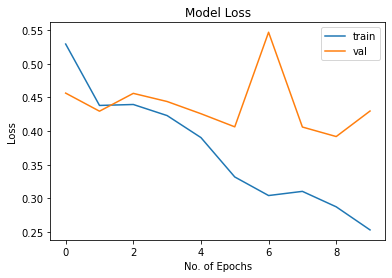

In [ ]:
# summarize history for loss
plt.plot(H0.history['loss'])
plt.plot(H0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='upper right')
#plt.savefig('graph3.pdf')
#from google.colab import files
#files.download('graph3.pdf')
plt.show()

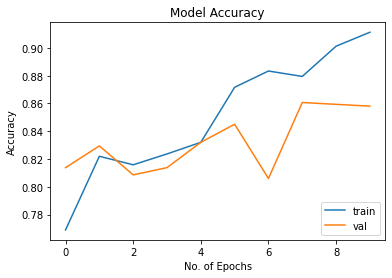

In [ ]:
# summarize history for accuracy
plt.plot(H0.history['categorical_accuracy'])
plt.plot(H0.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'val'], loc='lower right')
#plt.savefig('graph4.pdf')
#from google.colab import files
#files.download('graph4.pdf')
plt.show()